In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/ESAA/project/data/movies_metadata.csv")

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1. adult
False인 관측치만 냅두고 나머지는 다 제거함

In [3]:
pd.value_counts(data["adult"])

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [4]:
data=data[data["adult"]=="False"]

In [5]:
data[data["adult"]!="False"]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [6]:
pd.value_counts(data["adult"])

False    45454
Name: adult, dtype: int64

# 2. belongs_to_collection
collection이 있는 관측치는 collection name만 뽑아서 저장.

In [7]:
data["belongs_to_collection"].describe()

count                                                  4491
unique                                                 1695
top       {'id': 415931, 'name': 'The Bowery Boys', 'pos...
freq                                                     29
Name: belongs_to_collection, dtype: object

In [8]:
data["belongs_to_collection"].notnull()

0         True
1        False
2         True
3        False
4         True
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: belongs_to_collection, Length: 45454, dtype: bool

In [9]:
data["belongs_to_collection"]

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45454, dtype: object

In [10]:
type(data["belongs_to_collection"][0])

str

In [11]:
type(data["belongs_to_collection"][1])

float

In [12]:
collection=[]
for string in data["belongs_to_collection"]:
    if type(string)==float:
        collection.append(float("Nan"))
    else:
        col_dict=eval(string)
        collection.append(col_dict["name"])

In [13]:
collection[0:20]

['Toy Story Collection',
 nan,
 'Grumpy Old Men Collection',
 nan,
 'Father of the Bride Collection',
 nan,
 nan,
 nan,
 nan,
 'James Bond Collection',
 nan,
 nan,
 'Balto Collection',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Ace Ventura Collection',
 nan]

In [14]:
data["belongs_to_collection"]=collection

In [15]:
data["belongs_to_collection"]

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45461                               NaN
45462                               NaN
45463                               NaN
45464                               NaN
45465                               NaN
Name: belongs_to_collection, Length: 45454, dtype: object

# 3. budget
type을 flaot으로 변경

In [16]:
data["budget"].describe()

count     45454
unique     1223
top           0
freq      36565
Name: budget, dtype: object

In [17]:
data["budget"]=pd.to_numeric(data["budget"])

In [18]:
data["budget"].describe()

count    4.545400e+04
mean     4.225399e+06
std      1.742576e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

# 4. genres
genres name만 포함하는 리스트 형태로 저장

In [19]:
data["genres"].describe()

count                             45454
unique                             4066
top       [{'id': 18, 'name': 'Drama'}]
freq                               5000
Name: genres, dtype: object

In [20]:
data["genres"]

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45454, dtype: object

In [21]:
data["genres"][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [22]:
data["genres"][45464]

'[]'

In [23]:
eval(data["genres"][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [24]:
genres=[]
for string in data["genres"]:
    genres_list=eval(string)
    if len(genres_list)==0:
        genres.append(float("Nan"))
    else:
        genres2=[]
        for genres_dict in genres_list:
            genres_name=genres_dict["name"]
            genres2.append(genres_name)
        genres.append(genres2)

In [25]:
genres[0:20]

[['Animation', 'Comedy', 'Family'],
 ['Adventure', 'Fantasy', 'Family'],
 ['Romance', 'Comedy'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Action', 'Adventure', 'Drama', 'Family'],
 ['Action', 'Adventure', 'Thriller'],
 ['Adventure', 'Action', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Family', 'Animation', 'Adventure'],
 ['History', 'Drama'],
 ['Action', 'Adventure'],
 ['Drama', 'Crime'],
 ['Drama', 'Romance'],
 ['Crime', 'Comedy'],
 ['Crime', 'Comedy', 'Adventure'],
 ['Action', 'Comedy', 'Crime']]

In [26]:
data["genres"]=genres

In [27]:
data["genres"]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                             NaN
45465                             NaN
Name: genres, Length: 45454, dtype: object

# 5. homepage
변수 삭제

In [28]:
data["homepage"]

0        http://toystory.disney.com/toy-story
1                                         NaN
2                                         NaN
3                                         NaN
4                                         NaN
                         ...                 
45461    http://www.imdb.com/title/tt6209470/
45462                                     NaN
45463                                     NaN
45464                                     NaN
45465                                     NaN
Name: homepage, Length: 45454, dtype: object

In [29]:
del data["homepage"]

In [30]:
data.head()

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 6. id
type를 object에서 int로 변경 후 
같은 값 갖는 관측치는 하나만 남겨놓고 삭제

In [31]:
data["id"].describe()

count      45454
unique     45424
top       141971
freq           3
Name: id, dtype: object

In [32]:
data["id"]=pd.to_numeric(data["id"],errors='coerce')

In [33]:
pd.value_counts(data["id"])

141971    3
22649     2
12600     2
109962    2
14788     2
         ..
376934    1
86751     1
19164     1
29403     1
276895    1
Name: id, Length: 45424, dtype: int64

In [34]:
data[data["id"]==141971]

,adult,belongs_to_collection,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13261,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
13375,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[Thriller, Mystery]",141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0


In [35]:
data=data.drop_duplicates(["id"],keep="first")

In [36]:
pd.value_counts(data["id"])

2047      1
46492     1
38264     1
327029    1
62836     1
         ..
33765     1
176867    1
376934    1
86751     1
276895    1
Name: id, Length: 45424, dtype: int64

In [37]:
np.sum(data.duplicated(["id"]))

0

# 7. imdb_id
기존에 존재하던 중복행은 위의 전처리 과정들에서 모두 해결

영화별 고유값같은데 이미 id가 그 역할 해주고 있으니깐 그냥 제거

In [38]:
data["imdb_id"].describe()

count         45407
unique        45407
top       tt0071798
freq              1
Name: imdb_id, dtype: object

In [39]:
np.sum(pd.value_counts(data["imdb_id"])>1)

0

In [40]:
del data["imdb_id"]

In [41]:
data.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 8. original_language
모든 변수 전처리 끝난 후에 영어 영화만 따로 모은 데이터 추출 예정

Nan인 애들은 뒤에 spoken_language 변수 정리할때 다시 처리

In [42]:
data["original_language"].describe()

count     45413
unique       89
top          en
freq      32246
Name: original_language, dtype: object

In [43]:
pd.value_counts(data["original_language"])

en    32246
fr     2436
it     1528
ja     1347
de     1079
      ...  
ay        1
la        1
mt        1
sm        1
rw        1
Name: original_language, Length: 89, dtype: int64

In [44]:
np.sum(pd.isnull(data["original_language"]))

11

In [45]:
data[pd.isnull(data["original_language"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19574,False,NaN,0,[Documentary],283101,NaN,Shadowing the Third Man,Documentary about the production of The Third ...,0.017007,/xT9csxMKYbizRQgvNzCXJ67R7er.jpg,...,2004-10-11,0.0,95.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Shadowing the Third Man,False,0.0,0.0
21602,False,NaN,0,"[Romance, Drama]",103902,NaN,Unfinished Sky,An Outback farmer takes in an Afghani woman wh...,0.359818,/vfaJuZF0ocVwBEDYZhoULGuVxrz.jpg,...,2007-08-04,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Unfinished Sky,False,6.4,8.0
22832,False,NaN,0,"[War, Western]",359195,NaN,13 Fighting Men,A group of Union Army soldiers is charged with...,0.070647,/q5ADXvvzYtAOyrReIg1HckdPj62.jpg,...,1960-03-31,0.0,69.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,13 Fighting Men,False,0.0,0.0
32141,False,NaN,0,[Comedy],147050,NaN,Lambchops,George and Gracie enter an elegant drawing roo...,0.073418,/upQByEwY58sHWdL3RZm7kmRc44s.jpg,...,1929-10-31,0.0,8.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Lambchops,False,6.5,2.0
37407,False,NaN,0,[Animation],257095,NaN,Bajaja,The first fairy tale transformed into a full-l...,0.036841,/12wf2EkrPGxNzRbNyoau8GIFp3M.jpg,...,1950-01-26,0.0,87.0,"[{'iso_639_1': 'cs', 'name': 'Český'}]",Released,NaN,Prince Bayaya,False,5.0,1.0
41047,False,NaN,0,[Documentary],332742,NaN,Song of Lahore,"Until the late 1970s, the Pakistani city of La...",0.373688,/6iJqscs2xQLKKvrTCWmlHd9rf3W.jpg,...,2015-11-13,0.0,82.0,"[{'iso_639_1': 'ur', 'name': 'اردو'}, {'iso_63...",Released,NaN,Song of Lahore,False,6.5,2.0
41872,False,NaN,0,[Documentary],144410,NaN,Annabelle Serpentine Dance,Two dancers perform in succession facing a sta...,1.58434,/l7Lzvah6PL6vdMF5p0elKiyYqp9.jpg,...,1895-04-01,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Annabelle Serpentine Dance,False,5.7,20.0
44057,False,NaN,0,[Drama],380438,NaN,Lettre d'une inconnue,NaN,0.001283,/gk32ZWTYgfTXctEyCDAWeMcxo7X.jpg,...,2001-01-01,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Lettre d'une inconnue,False,0.0,0.0
44410,False,NaN,0,"[Animation, Documentary]",381096,NaN,Garn,The traditional crafts of crochet and knitting...,0.067624,/olEOCEGTW15WBPC0UnmLjokrmNF.jpg,...,2016-03-12,0.0,76.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,NaN,Yarn,False,0.0,0.0
44576,False,NaN,0,NaN,381525,NaN,WiNWiN,American investment fund buys Austrian compani...,0.030766,/pErCRQoc3nt8lCsExd3fFYgyBox.jpg,...,2016-01-27,0.0,84.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,WiNWiN,False,0.0,0.0


우선 냅두고 넘어간 다음에 뒤에가서 지정해줄게요!

# 9. original_title

In [46]:
data["original_title"].describe()

count                   45424
unique                  43363
top       Alice in Wonderland
freq                        8
Name: original_title, dtype: object

In [47]:
pd.value_counts(data["original_title"])

Alice in Wonderland     8
Hamlet                  8
Cinderella              7
The Three Musketeers    7
A Christmas Carol       7
                       ..
博士の愛した数式                1
激戰                      1
Le comiche 2            1
April's Shower          1
No Mercy                1
Name: original_title, Length: 43363, dtype: int64

In [48]:
data[data["original_title"]=="Alice in Wonderland"]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1003,False,NaN,3000000,"[Animation, Adventure, Family, Fantasy]",12092,en,Alice in Wonderland,"On a golden afternoon, young Alice follows a W...",16.4889,/9gJa2B6M8jt85aDkb0MF98MLZ9T.jpg,...,1951-07-03,5.720000e+08,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A world of wonders in One Great Picture,Alice in Wonderland,False,7.0,1557.0
9665,False,NaN,21000000,"[Fantasy, Family]",30923,en,Alice in Wonderland,Alice follows a white rabbit down a rabbit-hol...,8.6143,/c53p3QRI0BNx7KE1zH8fXoWq4sM.jpg,...,1999-02-28,0.000000e+00,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Masterpiece of Imagination...,Alice in Wonderland,False,6.1,71.0
11887,False,NaN,14000000,"[Family, Fantasy]",34573,en,Alice in Wonderland,Classic tale of a girl named Alice who follows...,3.79413,/1jlw8lSaLetDP4XqioTgK6R38Lt.jpg,...,1985-12-09,0.000000e+00,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,6.3,15.0
14892,False,Alice in Wonderland Collection,200000000,"[Family, Fantasy, Adventure]",12155,en,Alice in Wonderland,"Alice, an unpretentious and individual 19-year...",17.2851,/pvEE5EN5N1yjmHmldfL4aJWm56l.jpg,...,2010-03-03,1.025491e+09,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You're invited to a very important date.,Alice in Wonderland,False,6.4,4773.0
15868,False,NaN,0,"[Action, Adventure, Family, Fantasy, Science F...",25694,en,Alice in Wonderland,"On a boring winter afternoon, Alice dreams, th...",1.50435,/hA536GMozYb9zbMjo2NqESniveU.jpg,...,1933-12-22,0.000000e+00,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Entertainment Miracle Of All Times!,Alice in Wonderland,False,5.4,8.0
26894,False,NaN,0,"[Family, Fantasy, Science Fiction]",35109,en,Alice in Wonderland,Alice in Wonderland (1966) is a BBC television...,1.71604,/dWnbHEZ31kMOx8cnN7IvG3fBpwp.jpg,...,1966-12-26,0.000000e+00,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,6.9,8.0
32901,False,NaN,0,"[Family, Fantasy]",87300,en,Alice in Wonderland,A German adaptation of the classic Lewis Carro...,0.140291,/9YJqY2MWOUzy60iMhniOF4NEZRs.jpg,...,1915-01-15,0.000000e+00,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice in Wonderland,False,5.5,2.0
39530,False,NaN,0,[Fantasy],41278,en,Alice in Wonderland,This is the first movie version of the famous ...,0.708323,/rATc0e78ORRmJyvgqAywkejdgqh.jpg,...,1903-10-17,0.000000e+00,9.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Alice in Wonderland,False,6.1,20.0


위에서 중복행은 제거해줬기 때문에 같은 제목으로 나오는 영화들은 모두 다른 영화

# 10. overview

In [49]:
data["overview"].describe()

count                  44470
unique                 44297
top       No overview found.
freq                     133
Name: overview, dtype: object

In [50]:
data["overview"].value_counts()

No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                    133
No Overview                                                                                                                                                                                                                                                                                                                                                                                                                                                                             7
                                                    

In [51]:
text_counts = data["overview"].value_counts()
text_list = text_counts[text_counts > 1].index.tolist()

In [52]:
text_list

['No overview found.',
 'No Overview',
 ' ',
 'A few funny little novels about different aspects of life.',
 'No movie overview available.',
 'Adaptation of the Jane Austen novel.',
 'A former aristocrat Ippolit Vorobyaninov leads a miserable life in Soviet Russia. His mother-in-law reveals a secret to him - she hid family diamonds in one of the twelve chairs they once had. Vorobyaninov in cooperation with a young con artist Ostap Bender start a long search for the diamonds.',
 'Miser Ebenezer Scrooge is awakened on Christmas Eve by spirits who reveal to him his own miserable existence, what opportunities he wasted in his youth, his current cruelties, and the dire fate that awaits him if he does not change his ways. Scrooge is faced with his own story of growing bitterness and meanness, and must decide what his own future will hold: death or redemption.',
 "King Lear, old and tired, divides his kingdom among his daughters, giving great importance to their protestations of love for him.

In [53]:
overview_list=[]
for overview in data["overview"]:
    if overview=="No overview found.":
        overview_list.append("")
    elif overview=="No Overview":
        overview_list.append("")
    elif overview==" ":
        overview_list.append("")
    elif overview=="No movie overview available.":
        overview_list.append("")
    else:
        overview_list.append(overview)

In [54]:
data["overview"]=overview_list

In [55]:
data["overview"]

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
45461          Rising and falling between a man and woman.
45462    An artist struggles to finish his work while a...
45463    When one of her hits goes wrong, a professiona...
45464    In a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45424, dtype: object

# 11. popularity
type을 object에서 numeric으로 변환

In [56]:
data["popularity"].describe()

count     45421
unique    44149
top         0.0
freq         34
Name: popularity, dtype: object

In [57]:
data["popularity"]=pd.to_numeric(data["popularity"],errors='coerce')

In [58]:
data["popularity"].describe()

count    45421.000000
mean         2.921493
std          6.007204
min          0.000000
25%          0.385850
50%          1.127098
75%          3.678394
max        547.488298
Name: popularity, dtype: float64

# 12. poster_path
제거

In [59]:
del data["poster_path"]

In [60]:
data.head()

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# 13. production_companies

In [61]:
data["production_companies"].describe()

count     45421
unique    22704
top          []
freq      11865
Name: production_companies, dtype: object

In [62]:
data["production_companies"]

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45424, dtype: object

In [63]:
companies=[]
for string in data["production_companies"]:
    if type(string)==float:
        companies.append(float("Nan"))
    else:
        companies_list=eval(string)
        if len(companies_list)==0:
            companies.append(float("Nan"))
        else:
            companies2=[]
            for companies_dict in companies_list:
                companies_name=companies_dict["name"]
                companies2.append(companies_name)
            companies.append(companies2)

In [64]:
data["production_companies"]=companies

In [65]:
data["production_companies"]

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
45461                                                  NaN
45462                                        [Sine Olivia]
45463                            [American World Pictures]
45464                                          [Yermoliev]
45465                                                  NaN
Name: production_companies, Length: 45424, dtype: object

# 14. production_countries

In [66]:
data["production_countries"].describe()

count                                                 45421
unique                                                 2390
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                  17838
Name: production_countries, dtype: object

In [67]:
data["production_countries"]

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45424, dtype: object

In [68]:
countries=[]
for string in data["production_countries"]:
    if type(string)==float:
        countries.append(float("Nan"))
    else:
        countries_list=eval(string)
        if len(countries_list)==0:
            countries.append(float("Nan"))
        else:
            countries2=[]
            for countries_dict in countries_list:
                countries_name=countries_dict["name"]
                countries2.append(countries_name)
            countries.append(countries2)

In [69]:
data["production_countries"]=countries

In [70]:
data["production_countries"]

0        [United States of America]
1        [United States of America]
2        [United States of America]
3        [United States of America]
4        [United States of America]
                    ...            
45461                        [Iran]
45462                 [Philippines]
45463    [United States of America]
45464                      [Russia]
45465              [United Kingdom]
Name: production_countries, Length: 45424, dtype: object

In [71]:
data["production_countries"].describe()

count                          39143
unique                          2389
top       [United States of America]
freq                           17838
Name: production_countries, dtype: object

# 15. release_date
datetime으로 변환

In [72]:
data["release_date"].describe()

count          45338
unique         17329
top       2008-01-01
freq             136
Name: release_date, dtype: object

In [73]:
from datetime import datetime

In [74]:
date=[]
for string in data["release_date"]:
    if type(string)!=str:
        date.append(float("Nan"))
    else:
        date.append(datetime.strptime(string, "%Y-%m-%d"))

In [75]:
data["release_date"]=date

In [76]:
data["release_date"]

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45424, dtype: datetime64[ns]

# 16. revenue


In [77]:
data["revenue"].describe()

count    4.542100e+04
mean     1.121511e+07
std      6.435831e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [78]:
np.sum(data["revenue"].isnull())

3

In [79]:
data[pd.isnull(data["revenue"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[Action, Thriller, Drama]",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 17. runtime

In [80]:
data["runtime"].describe()

count    45164.000000
mean        94.129196
std         38.413954
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [81]:
np.sum(pd.isnull(data["runtime"]))

260

In [82]:
data[pd.isnull(data["runtime"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
634,False,NaN,0,[Comedy],287305,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,[Westdeutscher Rundfunk (WDR)],...,1996-03-21,0.0,NaN,[],Released,NaN,Peanuts – Die Bank zahlt alles,False,4.0,1.0
635,False,NaN,0,[Comedy],339428,de,Happy Weekend,NaN,0.002229,[Senator Film Produktion],...,1996-03-14,65335.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,False,0.0,0.0
644,False,NaN,0,[Drama],278978,de,Und keiner weint mir nach,NaN,0.439989,NaN,...,1996-02-29,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Und keiner weint mir nach,False,0.0,0.0
802,False,NaN,0,[Drama],282919,de,Diebinnen,NaN,0.106345,NaN,...,1996-06-20,0.0,NaN,[],Released,NaN,Diebinnen,False,4.0,1.0
863,False,NaN,0,[Thriller],253632,fr,Baton Rouge,NaN,0.437895,NaN,...,1988-10-08,0.0,NaN,[],Released,NaN,Baton Rouge,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45246,False,NaN,0,[Comedy],231216,de,Villa Henriette,NaN,0.002513,NaN,...,2004-12-02,0.0,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Villa Henriette,False,0.0,0.0
45310,False,NaN,0,NaN,418757,pl,Między nami dobrze jest,NaN,0.030803,NaN,...,2014-08-01,0.0,NaN,[],Released,NaN,Między nami dobrze jest,False,0.0,0.0
45313,False,NaN,0,[Drama],369444,pl,Ostatni dzwonek,NaN,0.000102,NaN,...,1989-10-27,0.0,NaN,[],Released,NaN,Ostatni dzwonek,False,0.0,0.0
45377,False,NaN,0,[Adventure],317389,es,Simbad e il califfo di Bagdad,NaN,0.006352,"[Roas Produzioni, Buton Film]",...,1973-07-22,0.0,NaN,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Simbad e il califfo di Bagdad,False,0.0,0.0


# 18. spoken_languages

In [83]:
data["spoken_languages"].describe()

count                                        45421
unique                                        1931
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22375
Name: spoken_languages, dtype: object

In [84]:
np.sum(pd.isnull(data["spoken_languages"]))

3

In [85]:
data[pd.isnull(data["spoken_languages"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[Action, Thriller, Drama]",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,Mardock Scramble Collection,0,"[Animation, Science Fiction]",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[TV Movie, Action, Horror, Science Fiction]",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
language=[]
for string in data["spoken_languages"]:
    if type(string)!=str:
        language.append(float("Nan"))
    else:
        language_list=eval(string)
        if len(language_list)==0:
            language.append(float("Nan"))
        else:
            language2=[]
            for language_dict in language_list:
                language_name=language_dict["name"]
                language2.append(language_name)
            language.append(language2)

In [87]:
data["spoken_languages"]=language

In [88]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

In [89]:
for string in data["spoken_languages"]:
    if type(string)==list:
        for lan in string:
            if lan=="":
                string.remove("")

In [90]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                     []
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

In [91]:
data = data.mask(data["spoken_languages"].map(str).eq('[]'))

In [92]:
data["spoken_languages"]

0                  [English]
1        [English, Français]
2                  [English]
3                  [English]
4                  [English]
                ...         
45461                [فارسی]
45462                    NaN
45463              [English]
45464                    NaN
45465              [English]
Name: spoken_languages, Length: 45424, dtype: object

# 19. status

In [93]:
data["status"].describe()

count        45218
unique           6
top       Released
freq         44856
Name: status, dtype: object

In [94]:
pd.value_counts(data["status"])

Released           44856
Rumored              229
Post Production       97
In Production         19
Planned               15
Canceled               2
Name: status, dtype: int64

In [95]:
np.sum(pd.isnull(data["status"]))

206

In [96]:
data[pd.isnull(data["status"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0.0,[Documentary],56088.0,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,NaN,...,1995-08-25,0.0,93.0,NaN,NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
767,False,NaN,0.0,[Documentary],52059.0,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.107050,NaN,...,1995-01-01,0.0,180.0,NaN,NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,False,NaN,0.0,[Comedy],40506.0,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,0.576741,NaN,...,1997-01-01,0.0,105.0,[English],NaN,NaN,Meet Wally Sparks,False,5.3,10.0
2140,False,NaN,0.0,NaN,77314.0,fr,The Cabinet of Dr. Ramirez,NaN,0.037500,NaN,...,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,False,NaN,0.0,"[Drama, Romance, Foreign]",49492.0,en,Jogwa - The Awakening,"Jogwa actually means alms given to a person, u...",0.004990,NaN,...,2009-09-25,0.0,92.0,NaN,NaN,The Awakening,Jogwa - The Awakening,False,0.0,0.0
45090,False,NaN,0.0,NaN,128268.0,en,Veruschka - Die Inszenierung (m)eines Körpers,Documentary about Veruschka von Lehndorff.,0.056298,NaN,...,2005-09-30,0.0,52.0,"[Deutsch, Français]",NaN,NaN,Veruschka: A Life for the Camera,False,6.0,1.0
45159,False,NaN,0.0,NaN,41811.0,en,Eating,"At a spacious house in Los Angeles, Helene is ...",0.000002,NaN,...,1990-11-30,0.0,110.0,[English],NaN,NaN,Eating,False,0.0,0.0
45442,False,NaN,0.0,NaN,44330.0,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.219260,NaN,...,1905-01-01,0.0,3.0,NaN,NaN,NaN,The Scheming Gambler's Paradise,False,5.0,3.0


Nan인 애들 중에 popularity나 revenue가 0인 아닌 애들은 개봉한거로 생각할 수 있으니깐 Released로 채울게요

In [97]:
data[pd.isnull(data["status"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
189,False,NaN,0.0,[Documentary],56088.0,en,The Show,A documentary about the culture of hip-hop. Th...,0.159596,NaN,...,1995-08-25,0.0,93.0,NaN,NaN,What Happens On Stage Is Only Half The Story!,The Show,False,5.3,2.0
767,False,NaN,0.0,[Documentary],52059.0,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,0.107050,NaN,...,1995-01-01,0.0,180.0,NaN,NaN,NaN,The Gate of Heavenly Peace,False,6.7,3.0
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,False,NaN,0.0,[Comedy],40506.0,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,0.576741,NaN,...,1997-01-01,0.0,105.0,[English],NaN,NaN,Meet Wally Sparks,False,5.3,10.0
2140,False,NaN,0.0,NaN,77314.0,fr,The Cabinet of Dr. Ramirez,NaN,0.037500,NaN,...,1991-12-04,0.0,NaN,NaN,NaN,NaN,The Cabinet of Dr. Ramirez,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,False,NaN,0.0,"[Drama, Romance, Foreign]",49492.0,en,Jogwa - The Awakening,"Jogwa actually means alms given to a person, u...",0.004990,NaN,...,2009-09-25,0.0,92.0,NaN,NaN,The Awakening,Jogwa - The Awakening,False,0.0,0.0
45090,False,NaN,0.0,NaN,128268.0,en,Veruschka - Die Inszenierung (m)eines Körpers,Documentary about Veruschka von Lehndorff.,0.056298,NaN,...,2005-09-30,0.0,52.0,"[Deutsch, Français]",NaN,NaN,Veruschka: A Life for the Camera,False,6.0,1.0
45159,False,NaN,0.0,NaN,41811.0,en,Eating,"At a spacious house in Los Angeles, Helene is ...",0.000002,NaN,...,1990-11-30,0.0,110.0,[English],NaN,NaN,Eating,False,0.0,0.0
45442,False,NaN,0.0,NaN,44330.0,en,Le tripot clandestin,A combination gambling den and bawdy house is ...,0.219260,NaN,...,1905-01-01,0.0,3.0,NaN,NaN,NaN,The Scheming Gambler's Paradise,False,5.0,3.0


# 20. tagline

In [98]:
data["tagline"].describe()

count                      20367
unique                     20249
top       Based on a true story.
freq                           7
Name: tagline, dtype: object

In [99]:
pd.value_counts(data["tagline"])

Based on a true story.                                                                                  7
Be careful what you wish for.                                                                           4
Trust no one.                                                                                           4
-                                                                                                       4
Documentary                                                                                             3
                                                                                                       ..
Short Cuts raises the roof on America.                                                                  1
More Kung foolery with the world's favorite martial arts munchkins!                                     1
The body count continues...                                                                             1
YOU'LL GET HAPPY HYSTERICS in this history-moc

In [100]:
np.sum(pd.isnull(data["tagline"]))

25057

In [101]:
data[pd.isnull(data["tagline"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
11,False,NaN,0.0,"[Comedy, Horror]",12110.0,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,"[Columbia Pictures, Castle Rock Entertainment,...",...,1995-12-22,0.0,88.0,"[English, Deutsch]",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
27,False,NaN,0.0,"[Drama, Romance]",17015.0,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,[BBC Films],...,1995-09-27,0.0,104.0,[English],Released,NaN,Persuasion,False,7.4,36.0
32,False,NaN,0.0,"[Romance, Adventure]",78802.0,fr,"Guillaumet, les ailes du courage",NaN,0.745542,[Iwerks Entertainment],...,1996-09-18,0.0,50.0,[English],Released,NaN,Wings of Courage,False,6.8,4.0
35,False,NaN,11000000.0,[Drama],687.0,en,Dead Man Walking,A justice drama based on a true story about a ...,6.891317,"[Havoc, PolyGram Filmed Entertainment, Working...",...,1995-12-29,39363635.0,122.0,[English],Released,NaN,Dead Man Walking,False,7.3,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,NaN,0.0,[Science Fiction],222848.0,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,[Concorde-New Horizons],...,1995-01-01,0.0,85.0,[English],Released,NaN,Caged Heat 3000,False,3.5,1.0
45460,False,NaN,0.0,"[Drama, Action, Romance]",30840.0,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45464,False,NaN,0.0,NaN,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


# 21. title

In [102]:
data["title"].describe()

count          45298
unique         42156
top       Cinderella
freq              11
Name: title, dtype: object

In [103]:
pd.value_counts(data["title"])

Cinderella                    11
Hamlet                         9
Alice in Wonderland            9
Les Misérables                 8
Beauty and the Beast           8
                              ..
Speed Racer                    1
The Other Guys                 1
Full Metal Jacket              1
Badlapur                       1
The Affair of the Necklace     1
Name: title, Length: 42156, dtype: int64

In [104]:
np.sum(pd.isnull(data["title"]))

126

In [105]:
data[pd.isnull(data["title"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 22. video

In [106]:
data["video"].describe()

count     45298
unique        2
top       False
freq      45205
Name: video, dtype: object

In [107]:
pd.value_counts(data["video"])

False    45205
True        93
Name: video, dtype: int64

In [108]:
np.sum(pd.isnull(data["video"]))

126

In [109]:
data[pd.isnull(data["video"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
data[data["video"]==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5492,False,NaN,0.0,"[Action, Adventure, Animation, Comedy, Family,...",15173.0,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.734181,[Big Idea Productions],...,2002-10-04,0.0,82.0,"[Český, English]",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,False,Loose Change Collection,5000.0,[Documentary],14277.0,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,0.651714,[Polar Film Medien GmbH],...,2006-06-01,0.0,100.0,[English],Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,False,NaN,0.0,[Documentary],284117.0,en,Fitna,A short film in which Quran verses are shown a...,0.040068,NaN,...,2008-03-27,0.0,15.0,"[English, Nederlands]",Released,NaN,Fitna,True,1.0,1.0
14271,False,Love Hina Collection,0.0,"[Comedy, Romance, Animation, Music]",44685.0,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",1.785708,"[TV Tokyo, Xebec]",...,2001-03-31,0.0,48.0,[日本語],Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,False,NaN,0.0,"[Action, Adventure, Family, Fantasy]",35148.0,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,NaN,...,2009-10-13,0.0,140.0,"[Français, English, Norsk, Português, ภาษาไทย,...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,False,NaN,0.0,"[Action, Animation, Horror]",161337.0,en,Underworld: Endless War,Underworld: Endless War is a collection of thr...,3.301063,NaN,...,2011-10-19,0.0,18.0,[English],Released,NaN,Underworld: Endless War,True,5.6,38.0
44798,False,NaN,0.0,"[Animation, Horror, Science Fiction]",425916.0,en,Salad Fingers,"The adventures of Salad Fingers, an unspecifie...",0.141367,NaN,...,NaT,0.0,52.0,[English],Released,NaN,Salad Fingers,True,8.5,4.0
44861,False,NaN,0.0,NaN,334795.0,ru,Конец Каникул,Four music videos of Kino band joined together...,0.000000,NaN,...,1986-01-01,0.0,23.0,[Pусский],Released,Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,False,NaN,0.0,"[Family, Drama, Comedy]",461088.0,fa,۵۰ کیلو آلبالو,When the corrupted groom starts shooting in th...,0.034119,NaN,...,2016-03-22,0.0,89.0,[فارسی],Released,NaN,50 Kilos of Sour Cherry,True,0.0,0.0


# 23. vote_average

In [111]:
data["vote_average"].describe()

count    45298.000000
mean         5.618021
std          1.921604
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [112]:
np.sum(pd.isnull(data["vote_average"]))

126

In [113]:
data[pd.isnull(data["vote_average"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 24. vote_count

In [114]:
data["vote_count"].describe()

count    45298.000000
mean       110.233785
std        492.150266
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [115]:
np.sum(pd.isnull(data["vote_count"]))

126

In [116]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nan 많은 행 제거

In [117]:
ind = data[pd.isnull(data["vote_count"])==True].index

In [118]:
ind

Int64Index([  773,  4184,  5283,  7778,  7798,  8902,  9459,  9712,  9738,
            11992,
            ...
            41901, 41902, 41903, 42296, 42468, 42992, 43313, 44597, 44835,
            45462],
           dtype='int64', length=126)

In [119]:
data.loc[ind]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
for i in ind:
    data=data.drop([i])

In [121]:
data[pd.isnull(data["vote_count"])==True]

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [122]:
data.isnull().sum()

adult                        0
belongs_to_collection    40814
budget                       0
genres                    2431
id                           0
original_language           11
original_title               0
overview                   954
popularity                   0
production_companies     11833
production_countries      6267
release_date                83
revenue                      0
runtime                    257
spoken_languages          3827
status                      80
tagline                  24931
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

## original_language 다시 정리

In [123]:
data["original_language"].describe()

count     45287
unique       83
top          en
freq      32204
Name: original_language, dtype: object

In [124]:
np.sum(pd.isnull(data["original_language"]))

11

In [125]:
index = pd.isnull(data["original_language"])==True

In [126]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
19574,NaN,Shadowing the Third Man,"[Austria, France, Japan, United Kingdom, Unite...","[Deutsch, English]",Shadowing the Third Man,2004-10-11
21602,NaN,Unfinished Sky,[Australia],[English],Unfinished Sky,2007-08-04
22832,NaN,13 Fighting Men,[United States of America],[English],13 Fighting Men,1960-03-31
32141,NaN,Lambchops,[United States of America],[English],Lambchops,1929-10-31
37407,NaN,Bajaja,[Czech Republic],[Český],Prince Bayaya,1950-01-26
41047,NaN,Song of Lahore,NaN,"[اردو, English, ਪੰਜਾਬੀ]",Song of Lahore,2015-11-13
41872,NaN,Annabelle Serpentine Dance,[United States of America],[No Language],Annabelle Serpentine Dance,1895-04-01
44057,NaN,Lettre d'une inconnue,[France],[Français],Lettre d'une inconnue,2001-01-01
44410,NaN,Garn,NaN,"[svenska, English, Íslenska]",Yarn,2016-03-12
44576,NaN,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27


original_title이랑 title이랑 같은 행은 spoken_language랑 original_language랑 같다고 봐도 될것 같아요!

song of lahore, WiNWiN은 미국 영화라 en으로 

In [127]:
data.loc[[19574,21602,22832,32141,41047,41872,44576,44655],"original_language"]="en"

체코어 언어부호(ISO 639-1)는	cs

In [128]:
data.loc[37407,"original_language"]="cs"

프랑스어 언어부호(ISO 639-1)는 fr

In [129]:
data.loc[44057,"original_language"]="fr"

스웨덴어 언어부호(ISO 639-1)는 sv

In [130]:
data.loc[44410,"original_language"]="sv"

In [131]:
data.loc[index,["original_language","original_title","production_countries","spoken_languages","title","release_date"]]

,original_language,original_title,production_countries,spoken_languages,title,release_date
19574,en,Shadowing the Third Man,"[Austria, France, Japan, United Kingdom, Unite...","[Deutsch, English]",Shadowing the Third Man,2004-10-11
21602,en,Unfinished Sky,[Australia],[English],Unfinished Sky,2007-08-04
22832,en,13 Fighting Men,[United States of America],[English],13 Fighting Men,1960-03-31
32141,en,Lambchops,[United States of America],[English],Lambchops,1929-10-31
37407,cs,Bajaja,[Czech Republic],[Český],Prince Bayaya,1950-01-26
41047,en,Song of Lahore,NaN,"[اردو, English, ਪੰਜਾਬੀ]",Song of Lahore,2015-11-13
41872,en,Annabelle Serpentine Dance,[United States of America],[No Language],Annabelle Serpentine Dance,1895-04-01
44057,fr,Lettre d'une inconnue,[France],[Français],Lettre d'une inconnue,2001-01-01
44410,sv,Garn,NaN,"[svenska, English, Íslenska]",Yarn,2016-03-12
44576,en,WiNWiN,[Austria],"[Deutsch, English]",WiNWiN,2016-01-27


### 최종 데이터

In [132]:
data

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",31357.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],...,1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,Father of the Bride Collection,0.0,[Comedy],11862.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",...,1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,NaN,0.0,"[Drama, Action, Romance]",30840.0,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[Westdeutscher Rundfunk (WDR), Working Title F...",...,1991-05-13,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0
45461,False,NaN,0.0,"[Drama, Family]",439050.0,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,NaN,...,NaT,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45463,False,NaN,0.0,"[Action, Drama, Thriller]",67758.0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],...,2003-08-01,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0.0,NaN,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],...,1917-10-21,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0


# 변수 분석

In [133]:
data.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.101425,0.449590,0.768804,0.135159,0.073737,0.676655
id,-0.101425,1.000000,-0.082937,-0.071098,-0.122570,-0.168158,-0.064660
popularity,0.449590,-0.082937,1.000000,0.506196,0.130467,0.154758,0.559946
revenue,0.768804,-0.071098,0.506196,1.000000,0.104288,0.084141,0.812014
runtime,0.135159,-0.122570,0.130467,0.104288,1.000000,0.158090,0.113954
vote_average,0.073737,-0.168158,0.154758,0.084141,0.158090,1.000000,0.123972
vote_count,0.676655,-0.064660,0.559946,0.812014,0.113954,0.123972,1.000000


<AxesSubplot:>

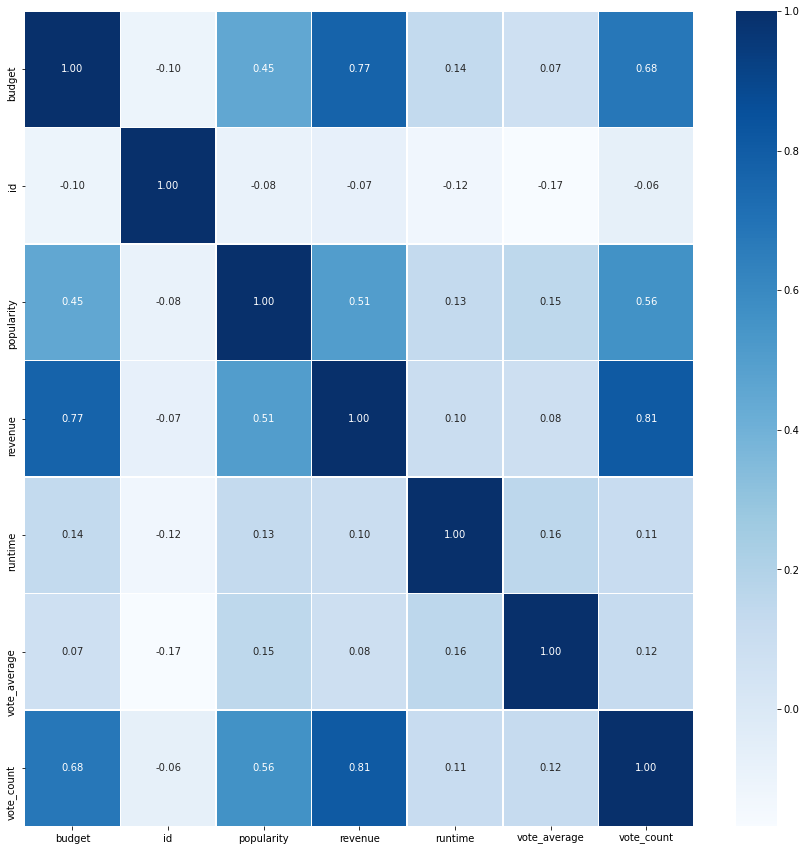

In [134]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

- budget과 popularity, revenue, vote_count
- popularity와 revenue, vote_count
- revenue와 vote_count

- 예산이 많이 든 영화일수록 인기, 수입이 높으며 그에 따라 평점을 남긴 사람의 수도 많음
- 인기가 많은 영화일수록 수입과 평점을 남긴 사람의 수가 많음
- 수입을 많이 얻은 영화일수록 평점을 남긴 사람의 수가 많음

__budget, popularity, revenue, vote_count 사이의 상관관계가 높으므로 이 변수들을 이용한 분석 가능__

<AxesSubplot:>

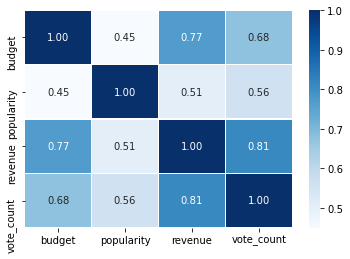

In [135]:
sns.heatmap(data = data[["budget", "popularity", "revenue", "vote_count"]].corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

그러나 범주형 변수의 경우엔 상관관계를 파악하기 어려움 
=> 그래프 그려서 확인

## belongs to collection에 따른 budget, popularity, revenue, vote_count

In [136]:
data["belongs_to_collection"] = data["belongs_to_collection"].fillna("No Collection")

In [137]:
data["belongs_to_collection"].nunique()

1694

In [138]:
collection=data.groupby(data["belongs_to_collection"])

In [139]:
collection.size().sort_values(ascending=False)

belongs_to_collection
No Collection                    40814
The Bowery Boys                     29
Totò Collection                     27
James Bond Collection               26
Zatôichi: The Blind Swordsman       26
                                 ...  
Sides of the Bed                     1
Showgirls Collection                 1
Short Peace                          1
Flatland Collection                  1
Dreileben                            1
Length: 1694, dtype: int64

In [140]:
budget_pivot = data.pivot_table(index='belongs_to_collection', values='budget', aggfunc={"budget":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Collections')

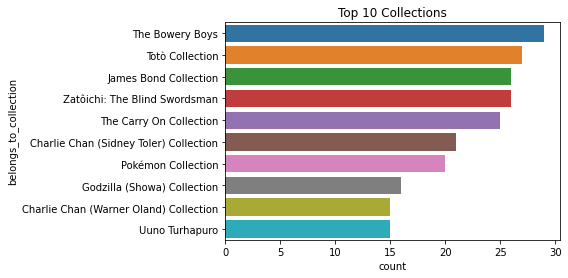

In [141]:
budget_data = budget_pivot.sort_values('count', ascending=False)[1:11]
sns.barplot(x="count", y="belongs_to_collection", data=budget_data)
plt.title("Top 10 Collections")

### budget

In [142]:
budget_pivot.sort_values('sum', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
900,No Collection,40814,3.216469e+06,1.312770e+11
645,James Bond Collection,26,5.921731e+07,1.539650e+09
551,Harry Potter Collection,8,1.600000e+08,1.280000e+09
967,Pirates of the Caribbean Collection,5,2.500000e+08,1.250000e+09
1316,The Fast and the Furious Collection,8,1.261250e+08,1.009000e+09
1655,X-Men Collection,6,1.638333e+08,9.830000e+08
1549,Transformers Collection,5,1.930000e+08,9.650000e+08
1159,Star Wars Collection,8,1.067938e+08,8.543500e+08
1351,The Hobbit Collection,3,2.500000e+08,7.500000e+08
1482,The Terminator Collection,5,1.322800e+08,6.614000e+08


In [143]:
budget_pivot.sort_values('mean', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
1351,The Hobbit Collection,3,2.500000e+08,7.500000e+08
1244,The Avengers Collection,2,2.500000e+08,5.000000e+08
967,Pirates of the Caribbean Collection,5,2.500000e+08,1.250000e+09
797,Man of Steel Collection,2,2.375000e+08,4.750000e+08
1233,The Amazing Spider-Man Collection,2,2.075000e+08,4.150000e+08
1650,World War Z Collection,1,2.000000e+08,2.000000e+08
1145,Spider-Man Collection,3,1.990000e+08,5.970000e+08
1289,The Dark Knight Collection,3,1.950000e+08,5.850000e+08
1549,Transformers Collection,5,1.930000e+08,9.650000e+08
221,Captain America Collection,3,1.866667e+08,5.600000e+08


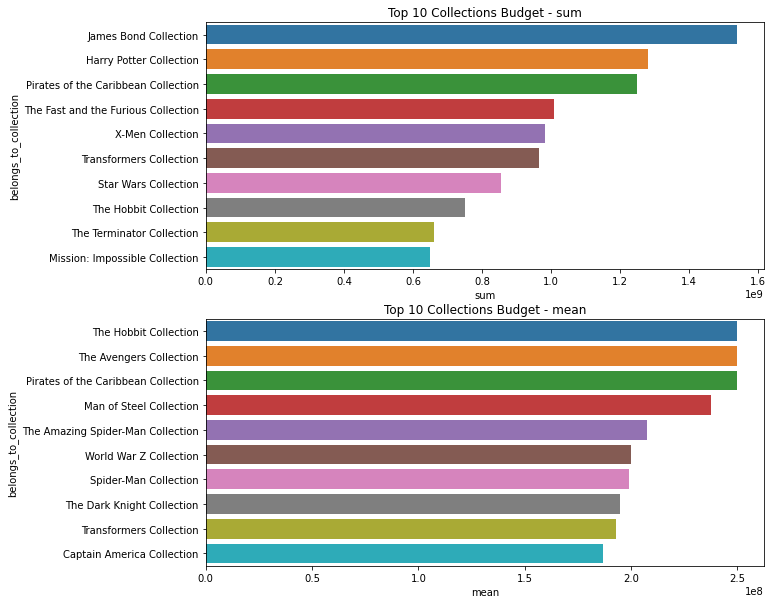

In [144]:
plt.figure(figsize=[10,10])

plt.subplot(211)
budget_data = budget_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="belongs_to_collection", data=budget_data)
plt.title("Top 10 Collections Budget - sum")

plt.subplot(212)
budget_data = budget_pivot.sort_values('mean', ascending=False)[0:10]
sns.barplot(x="mean", y="belongs_to_collection", data=budget_data)
plt.title("Top 10 Collections Budget - mean")

plt.show()

### Popularity

In [145]:
popularity_pivot = data.pivot_table(index='belongs_to_collection', values='popularity', aggfunc={"popularity":['mean', 'sum', 'count']}).reset_index()

In [146]:
popularity_pivot.sort_values('sum', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
900,No Collection,40814,2.563160,104612.817648
325,Despicable Me Collection,6,106.715961,640.295768
645,James Bond Collection,26,13.453502,349.791063
1648,Wonder Woman Collection,1,294.337037,294.337037
967,Pirates of the Caribbean Collection,5,53.972237,269.861183
971,Planet of the Apes (Reboot) Collection,3,87.720253,263.160759
529,Guardians of the Galaxy Collection,2,119.311296,238.622593
654,John Wick Collection,2,116.558939,233.117879
1358,The Hunger Games Collection,4,54.766747,219.066990
551,Harry Potter Collection,8,26.253893,210.031146


In [147]:
popularity_pivot.sort_values('mean', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
1648,Wonder Woman Collection,1,294.337037,294.337037
309,Deadpool Collection,1,187.860492,187.860492
529,Guardians of the Galaxy Collection,2,119.311296,238.622593
654,John Wick Collection,2,116.558939,233.117879
325,Despicable Me Collection,6,106.715961,640.295768
178,Blade Runner Collection,1,96.272374,96.272374
112,Avatar Collection,2,95.545473,191.090947
971,Planet of the Apes (Reboot) Collection,3,87.720253,263.160759
1244,The Avengers Collection,2,63.633534,127.267068
221,Captain America Collection,3,61.307807,183.923421


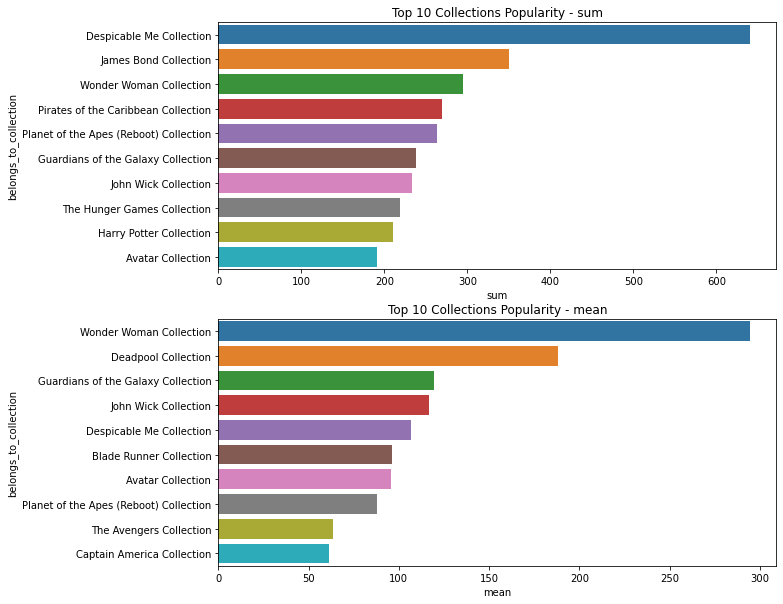

In [148]:
plt.figure(figsize=[10,10])

plt.subplot(211)
pop_data = popularity_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="belongs_to_collection", data=pop_data)
plt.title("Top 10 Collections Popularity - sum")

plt.subplot(212)
pop_data = popularity_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="belongs_to_collection", data=pop_data)
plt.title("Top 10 Collections Popularity - mean")

plt.show()

### Revenue

In [149]:
revenue_pivot = data.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={"revenue":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Collections')

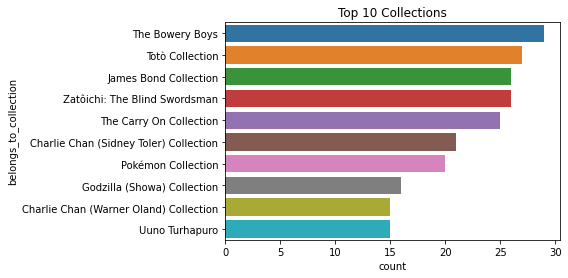

In [150]:
revenue_data = revenue_pivot.sort_values('count', ascending=False)[1:11]
sns.barplot(x="count", y="belongs_to_collection", data=revenue_data)
plt.title("Top 10 Collections")

In [151]:
revenue_pivot.sort_values('sum', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
900,No Collection,40814,6.475151e+06,2.642768e+11
551,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1159,Star Wars Collection,8,9.293118e+08,7.434495e+09
645,James Bond Collection,26,2.733450e+08,7.106970e+09
1316,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
967,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1549,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,6,6.151784e+08,3.691070e+09
1490,The Twilight Collection,5,6.684215e+08,3.342107e+09
609,Ice Age Collection,5,6.433417e+08,3.216709e+09


In [152]:
revenue_pivot.sort_values('mean', ascending=False)[0:11]

,belongs_to_collection,count,mean,sum
1244,The Avengers Collection,2,1.462481e+09,2.924962e+09
112,Avatar Collection,2,1.393983e+09,2.787965e+09
445,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1351,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1387,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
551,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1159,Star Wars Collection,8,9.293118e+08,7.434495e+09
967,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1456,The Secret Life of Pets Collection,1,8.754579e+08,8.754579e+08
1549,Transformers Collection,5,8.732202e+08,4.366101e+09


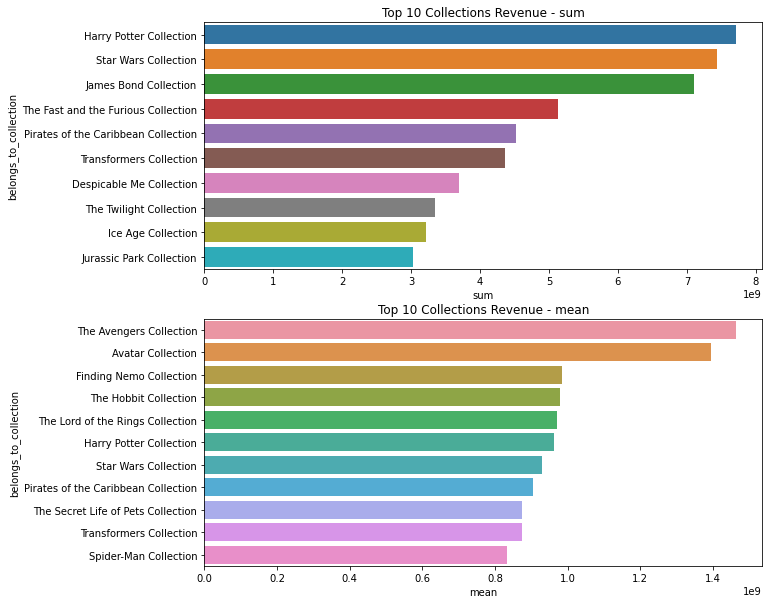

In [153]:
plt.figure(figsize=[10,10])

plt.subplot(211)
revenue_data = revenue_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="belongs_to_collection", data=revenue_data)
plt.title("Top 10 Collections Revenue - sum")

plt.subplot(212)
revenue_data = revenue_pivot.sort_values('mean', ascending=False)[0:11]
sns.barplot(x="mean", y="belongs_to_collection", data=revenue_data)
plt.title("Top 10 Collections Revenue - mean")

plt.show()

### Vote Count

In [154]:
vote_count_pivot = data.pivot_table(index='belongs_to_collection', values='vote_count', aggfunc={"vote_count":['mean', 'sum', 'count']}).reset_index()

In [155]:
vote_count_pivot.sort_values('sum', ascending=False).head(11)

,belongs_to_collection,count,mean,sum
900,No Collection,40814,77.245038,3152679.0
551,Harry Potter Collection,8,5983.250000,47866.0
1159,Star Wars Collection,8,5430.375000,43443.0
645,James Bond Collection,26,1284.307692,33392.0
1289,The Dark Knight Collection,3,9681.000000,29043.0
1655,X-Men Collection,6,4593.833333,27563.0
1358,The Hunger Games Collection,4,6543.500000,26174.0
1316,The Fast and the Furious Collection,8,3197.000000,25576.0
967,Pirates of the Caribbean Collection,5,5016.000000,25080.0
634,Iron Man Collection,3,8290.333333,24871.0


In [156]:
vote_count_pivot.sort_values('mean', ascending=False).head(11)

,belongs_to_collection,count,mean,sum
309,Deadpool Collection,1,11444.000000,11444.0
1289,The Dark Knight Collection,3,9681.000000,29043.0
1244,The Avengers Collection,2,9454.000000,18908.0
634,Iron Man Collection,3,8290.333333,24871.0
1387,The Lord of the Rings Collection,3,8253.000000,24759.0
529,Guardians of the Galaxy Collection,2,7436.000000,14872.0
221,Captain America Collection,3,6839.000000,20517.0
797,Man of Steel Collection,2,6825.500000,13651.0
1358,The Hunger Games Collection,4,6543.500000,26174.0
112,Avatar Collection,2,6086.000000,12172.0


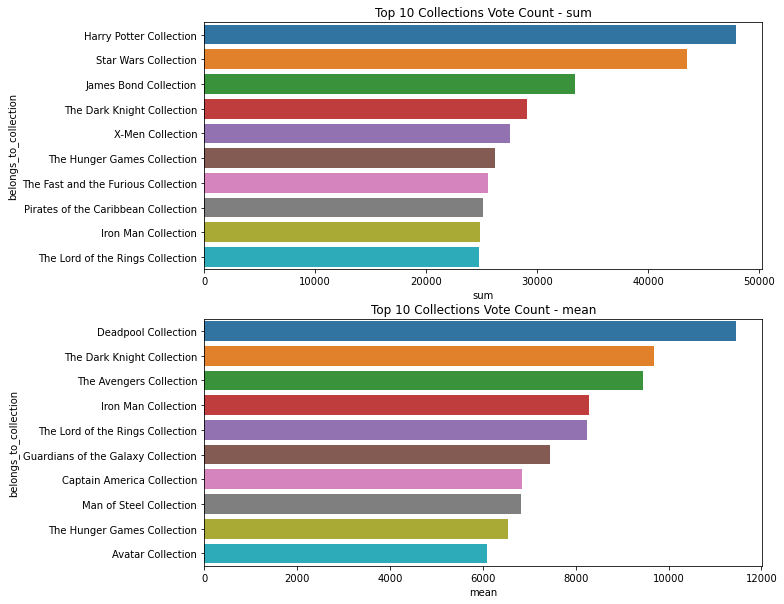

In [157]:
plt.figure(figsize=[10,10])

plt.subplot(211)
vote_data = vote_count_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="belongs_to_collection", data=vote_data)
plt.title("Top 10 Collections Vote Count - sum")

plt.subplot(212)
vote_data = vote_count_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="belongs_to_collection", data=vote_data)
plt.title("Top 10 Collections Vote Count - mean")

plt.show()

## production company에 따른 budget, popularity, revenue, vote_count

In [158]:
com_df = data[:]

In [159]:
s = com_df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [160]:
com_df = com_df.drop('production_companies', axis=1).join(s)
com_df

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,companies
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[United States of America],...,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,Pixar Animation Studios
1,False,No Collection,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,[United States of America],...,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,TriStar Pictures
1,False,No Collection,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,[United States of America],...,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Teitler Film
1,False,No Collection,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,[United States of America],...,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Interscope Communications
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,[United States of America],...,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Warner Bros.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,No Collection,0.0,"[Drama, Action, Romance]",30840.0,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,"[Canada, Germany, United Kingdom, United State...",...,0.0,104.0,[English],Released,NaN,Robin Hood,False,5.7,26.0,CanWest Global Communications
45461,False,No Collection,0.0,"[Drama, Family]",439050.0,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[Iran],...,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45463,False,No Collection,0.0,"[Action, Drama, Thriller]",67758.0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[United States of America],...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,American World Pictures
45464,False,No Collection,0.0,NaN,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Russia],...,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0,Yermoliev


In [161]:
company=com_df.groupby("companies")
company.size().sort_values(ascending=False)

companies
Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1074
Paramount Pictures                        1001
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
                                          ... 
Morning View Films                           1
Morningstar Entertainment                    1
Morocco Film Assistance                      1
Morocco Junction Pictures                    1
"DIA" Productions GmbH & Co. KG              1
Length: 23450, dtype: int64

In [162]:
budget_pivot = com_df.pivot_table(index='companies', values='budget', aggfunc={"budget":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Collections')

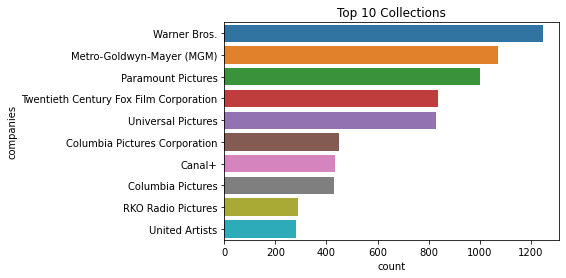

In [163]:
budget_data = budget_pivot.sort_values('count', ascending=False)[0:10]
sns.barplot(x="count", y="companies", data=budget_data)
plt.title("Top 10 Collections")

### budget

In [164]:
budget_pivot.sort_values('sum', ascending=False)[0:10]

,companies,count,mean,sum
22402,Warner Bros.,1250,1.884582e+07,2.355727e+10
21776,Universal Pictures,830,2.121015e+07,1.760442e+10
15651,Paramount Pictures,1001,1.628327e+07,1.629955e+10
21479,Twentieth Century Fox Film Corporation,836,1.604747e+07,1.341569e+10
4726,Columbia Pictures,431,2.971961e+07,1.280915e+10
22363,Walt Disney Pictures,263,4.862029e+07,1.278714e+10
14553,New Line Cinema,277,2.552774e+07,7.071185e+09
22117,Village Roadshow Pictures,106,6.124340e+07,6.491800e+09
17289,Relativity Media,119,5.111048e+07,6.082147e+09
21191,Touchstone Pictures,225,2.609904e+07,5.872285e+09


In [165]:
budget_pivot.sort_values('mean', ascending=False)[0:11]

,companies,count,mean,sum
18802,Silver Bullet Productions (II),1,255000000.0,255000000.0
4532,Classic Media,1,255000000.0,255000000.0
22206,Vita-Ray Dutch Productions (III),1,250000000.0,250000000.0
5655,Deluxe Digital Studios,1,250000000.0,250000000.0
154,3Foot7,1,250000000.0,250000000.0
18399,Second Mate Productions,2,250000000.0,500000000.0
1870,B24,1,245000000.0,245000000.0
18835,Silverbell Films,1,225000000.0,225000000.0
15342,Ozumi Films,1,225000000.0,225000000.0
22876,XM3 Service,1,210000000.0,210000000.0


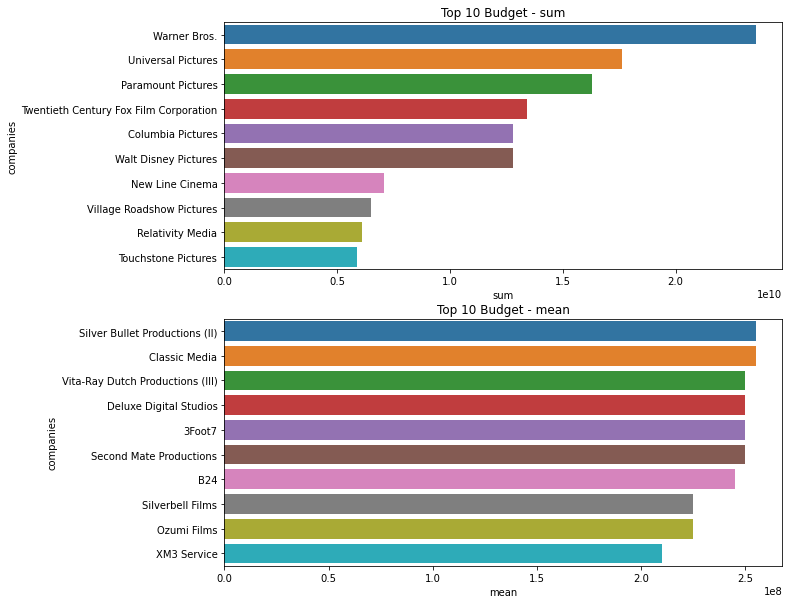

In [166]:
plt.figure(figsize=[10,10])

plt.subplot(211)
budget_data = budget_pivot.sort_values('sum', ascending=False)[0:10]
sns.barplot(x="sum", y="companies", data=budget_data)
plt.title("Top 10 Budget - sum")

plt.subplot(212)
budget_data = budget_pivot.sort_values('mean', ascending=False)[0:10]
sns.barplot(x="mean", y="companies", data=budget_data)
plt.title("Top 10 Budget - mean")

plt.show()

### Popularity

In [167]:
com_df["popularity"]=pd.to_numeric(com_df["popularity"],errors='coerce')

In [168]:
popularity_pivot = com_df.pivot_table(index='companies', values='popularity', aggfunc={"popularity":['mean', 'sum','count']}).reset_index()

In [169]:
popularity_pivot.sort_values('sum', ascending=False).head(10)

,companies,count,mean,sum
22402,Warner Bros.,1250,6.235551,7794.439013
21776,Universal Pictures,830,7.728821,6414.921252
15651,Paramount Pictures,1001,5.660164,5665.823784
21479,Twentieth Century Fox Film Corporation,836,6.291431,5259.636535
22363,Walt Disney Pictures,263,12.626320,3320.722160
4726,Columbia Pictures,431,7.487734,3227.213446
13506,Metro-Goldwyn-Mayer (MGM),1074,2.916702,3132.537782
14553,New Line Cinema,277,8.674386,2402.804838
3498,Canal+,435,4.770399,2075.123383
4727,Columbia Pictures Corporation,448,4.002772,1793.241956


In [170]:
popularity_pivot.sort_values('mean', ascending=False).head(10)

,companies,count,mean,sum
20127,TENCENT PICTURES,1,294.337037,294.337037
20627,The Donners' Company,1,187.860492,187.860492
5623,DefyNite Films,1,183.870374,183.870374
5176,Cruel & Unusual Films,2,162.886458,325.772916
22387,Wanda Pictures,2,157.320335,314.640669
1487,Artemple - Hollywood,1,154.801009,154.801009
22206,Vita-Ray Dutch Productions (III),1,145.882135,145.882135
5655,Deluxe Digital Studios,1,145.882135,145.882135
11211,Kinberg Genre,2,108.286507,216.573014
9987,Image Nation,1,88.439243,88.439243


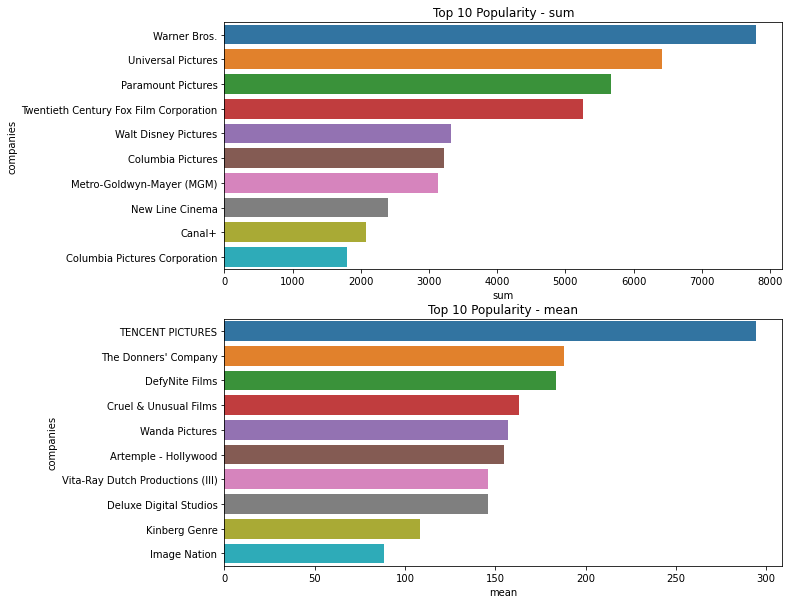

In [171]:
plt.figure(figsize=[10,10])

plt.subplot(211)
pop_data = popularity_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="companies", data=pop_data)
plt.title("Top 10 Popularity - sum")

plt.subplot(212)
pop_data = popularity_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="companies", data=pop_data)
plt.title("Top 10 Popularity - mean")

plt.show()

### Revenue

In [172]:
revenue_pivot = com_df.pivot_table(index='companies', values='revenue', aggfunc={"revenue":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Companies')

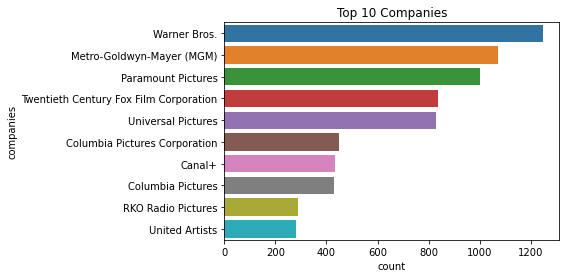

In [173]:
revenue_data = revenue_pivot.sort_values('count', ascending=False).head(10)
sns.barplot(x="count", y="companies", data=revenue_data)
plt.title("Top 10 Companies")

In [174]:
revenue_pivot.sort_values('sum', ascending=False).head(10)

,companies,count,mean,sum
22402,Warner Bros.,1250,5.082015e+07,6.352519e+10
21776,Universal Pictures,830,6.657734e+07,5.525919e+10
15651,Paramount Pictures,1001,4.872068e+07,4.876940e+10
21479,Twentieth Century Fox Film Corporation,836,5.704276e+07,4.768775e+10
22363,Walt Disney Pictures,263,1.552748e+08,4.083727e+10
4726,Columbia Pictures,431,7.489498e+07,3.227974e+10
14553,New Line Cinema,277,8.004834e+07,2.217339e+10
983,Amblin Entertainment,76,2.282068e+08,1.734372e+10
6095,DreamWorks SKG,95,1.629027e+08,1.547575e+10
6167,Dune Entertainment,65,2.308275e+08,1.500379e+10


In [175]:
revenue_pivot.sort_values('mean', ascending=False).head(10)

,companies,count,mean,sum
4712,"Colorado Office of Film, Television & Media",1,1.506249e+09,1.506249e+09
495,Abu Dhabi Film Commission,1,1.506249e+09,1.506249e+09
5655,Deluxe Digital Studios,1,1.153304e+09,1.153304e+09
22206,Vita-Ray Dutch Productions (III),1,1.153304e+09,1.153304e+09
9904,Ian Bryce Productions,1,1.091405e+09,1.091405e+09
2621,Black Hangar Studios,1,1.056057e+09,1.056057e+09
21415,Truenorth Productions,2,1.037012e+09,2.074024e+09
18399,Second Mate Productions,2,1.013330e+09,2.026660e+09
154,3Foot7,1,9.560198e+08,9.560198e+08
15738,Patalex IV Productions Limited,1,8.959210e+08,8.959210e+08


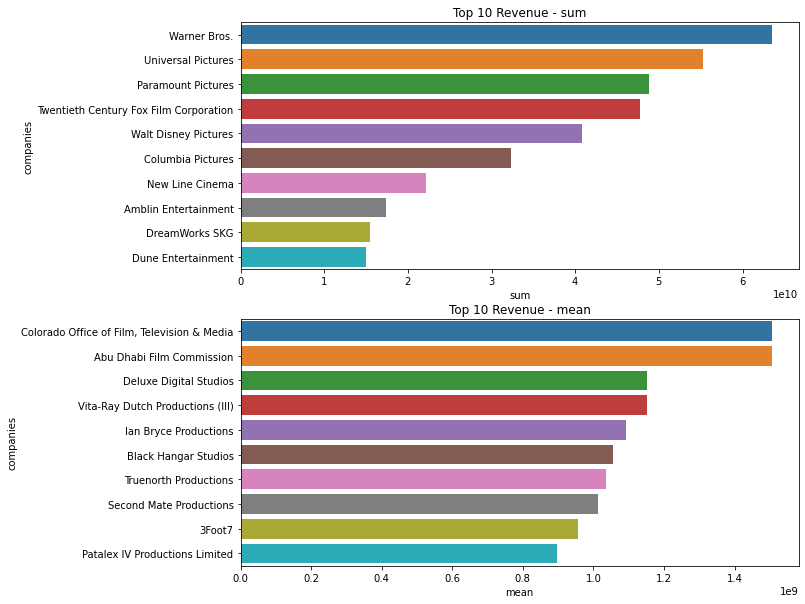

In [176]:
plt.figure(figsize=[10,10])

plt.subplot(211)
revenue_data = revenue_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="companies", data=revenue_data)
plt.title("Top 10 Revenue - sum")

plt.subplot(212)
revenue_data = revenue_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="companies", data=revenue_data)
plt.title("Top 10 Revenue - mean")

plt.show()

### Vote Count

In [177]:
vote_count_pivot = com_df.pivot_table(index='companies', values='vote_count', aggfunc={"vote_count":['mean', 'sum', 'count']}).reset_index()

In [178]:
vote_count_pivot.sort_values('sum', ascending=False).head(10)

,companies,count,mean,sum
22402,Warner Bros.,1250,452.779200,565974.0
21776,Universal Pictures,830,488.049398,405081.0
15651,Paramount Pictures,1001,370.685315,371056.0
21479,Twentieth Century Fox Film Corporation,836,442.039474,369545.0
4726,Columbia Pictures,431,611.812065,263691.0
22363,Walt Disney Pictures,263,941.224335,247542.0
14553,New Line Cinema,277,640.187726,177332.0
11844,Legendary Pictures,42,3230.690476,135689.0
22117,Village Roadshow Pictures,106,1272.867925,134924.0
17289,Relativity Media,119,1016.647059,120981.0


In [179]:
vote_count_pivot.sort_values('mean', ascending=False).head(10)

,companies,count,mean,sum
20627,The Donners' Company,1,11444.0,11444.0
11211,Kinberg Genre,2,8137.5,16275.0
15737,Patalex III Productions Limited,1,7511.0,7511.0
5655,Deluxe Digital Studios,1,7462.0,7462.0
22206,Vita-Ray Dutch Productions (III),1,7462.0,7462.0
20060,Syncopy,10,7069.1,70691.0
23073,Zehnte Babelsberg,1,6598.0,6598.0
22178,Visiona Romantica,1,6598.0,6598.0
7936,FortyFour Studios,1,6439.0,6439.0
9841,IFP Westcoast Erste,1,6324.0,6324.0


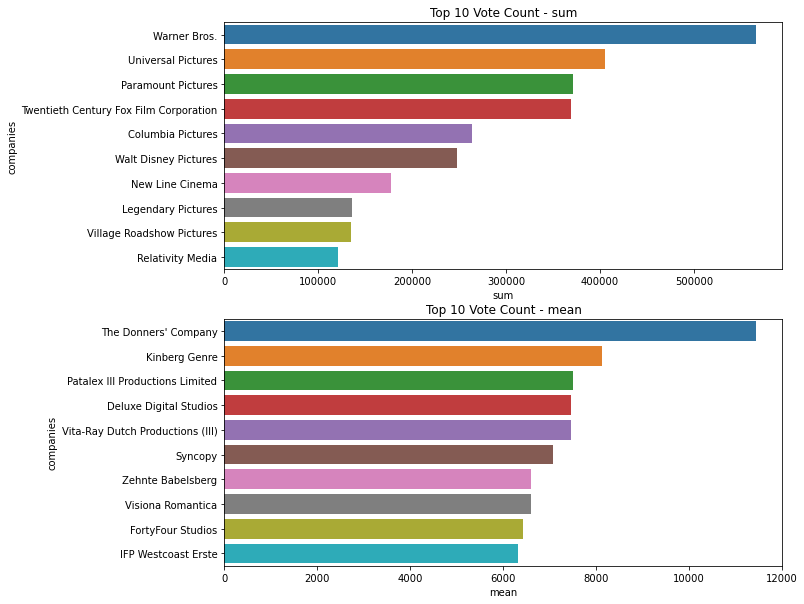

In [180]:
plt.figure(figsize=[10,10])

plt.subplot(211)
vote_data = vote_count_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="companies", data=vote_data)
plt.title("Top 10 Vote Count - sum")

plt.subplot(212)
vote_data = vote_count_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="companies", data=vote_data)
plt.title("Top 10 Vote Count - mean")

plt.show()

## original_language에 따른 budget, popularity, revenue, vote_count

In [181]:
ori_lan=data.groupby("original_language")
ori_lan.size().sort_values(ascending=False)

original_language
en    32212
fr     2437
it     1528
ja     1345
de     1079
      ...  
lb        1
la        1
eo        1
jv        1
zu        1
Length: 83, dtype: int64

In [182]:
budget_pivot = data.pivot_table(index='original_language', values='budget', aggfunc={"budget":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Languages')

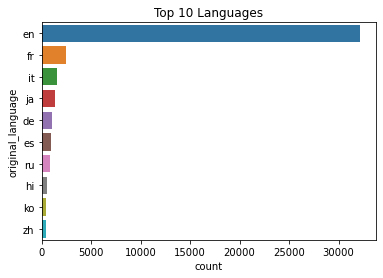

In [183]:
budget_data = budget_pivot.sort_values('count', ascending=False)[0:10]
sns.barplot(x="count", y="original_language", data=budget_data)
plt.title("Top 10 Languages")

### budget

In [184]:
budget_pivot.sort_values('sum', ascending=False)[0:10]

,original_language,count,mean,sum
17,en,32212,5.615909e+06,1.808997e+11
24,fr,2437,1.087749e+06,2.650845e+09
81,zh,408,3.635947e+06,1.483466e+09
61,ru,824,1.164977e+06,9.599407e+08
34,ja,1345,6.965769e+05,9.368959e+08
27,hi,508,1.832866e+06,9.310958e+08
19,es,991,6.182607e+05,6.126964e+08
15,de,1079,5.379212e+05,5.804170e+08
11,cn,312,1.678812e+06,5.237893e+08
32,it,1528,2.938362e+05,4.489816e+08


In [185]:
budget_pivot.sort_values('mean', ascending=False)[0:11]

,original_language,count,mean,sum
17,en,32212,5.615909e+06,1.808997e+11
81,zh,408,3.635947e+06,1.483466e+09
69,ta,78,2.514179e+06,1.961059e+08
10,ca,12,2.133333e+06,2.560000e+07
27,hi,508,1.832866e+06,9.310958e+08
70,te,45,1.719538e+06,7.737922e+07
11,cn,312,1.678812e+06,5.237893e+08
47,ml,11,1.586364e+06,1.745000e+07
1,af,2,1.500000e+06,3.000000e+06
61,ru,824,1.164977e+06,9.599407e+08


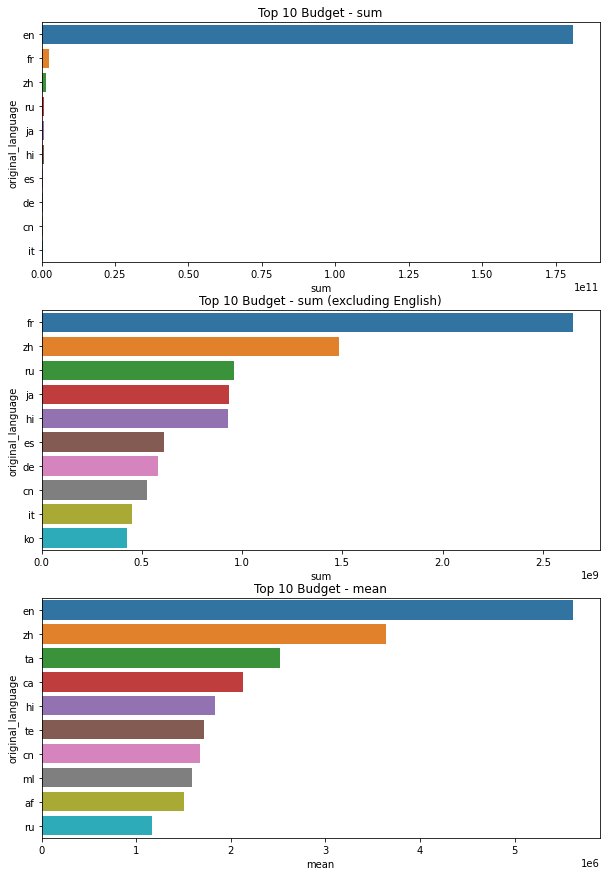

In [186]:
plt.figure(figsize=[10,15])

plt.subplot(311)
budget_data = budget_pivot.sort_values('sum', ascending=False)[0:10]
sns.barplot(x="sum", y="original_language", data=budget_data)
plt.title("Top 10 Budget - sum")

plt.subplot(312)
budget_data = budget_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="original_language", data=budget_data)
plt.title("Top 10 Budget - sum (excluding English)")

plt.subplot(313)
budget_data = budget_pivot.sort_values('mean', ascending=False)[0:10]
sns.barplot(x="mean", y="original_language", data=budget_data)
plt.title("Top 10 Budget - mean")

plt.show()

### Popularity

In [187]:
popularity_pivot = data.pivot_table(index='original_language', values='popularity', aggfunc={"popularity":['mean', 'sum','count']}).reset_index()

In [188]:
popularity_pivot.sort_values('sum', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,3.371419,108600.164650
24,fr,2437,2.459612,5994.074358
34,ja,1345,2.225040,2992.678724
32,it,1528,1.686057,2576.294864
19,es,991,1.802005,1785.787297
15,de,1079,1.651595,1782.070783
39,ko,444,2.308183,1024.833334
61,ru,824,1.173213,966.727361
11,cn,312,3.079222,960.717365
81,zh,408,2.319958,946.542939


In [189]:
popularity_pivot.sort_values('mean', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,3.371419,108600.164650
1,af,2,3.291494,6.582988
11,cn,312,3.079222,960.717365
54,no,106,2.476692,262.529356
14,da,223,2.467046,550.151344
24,fr,2437,2.459612,5994.074358
81,zh,408,2.319958,946.542939
39,ko,444,2.308183,1024.833334
34,ja,1345,2.225040,2992.678724
72,th,75,2.054719,154.103960


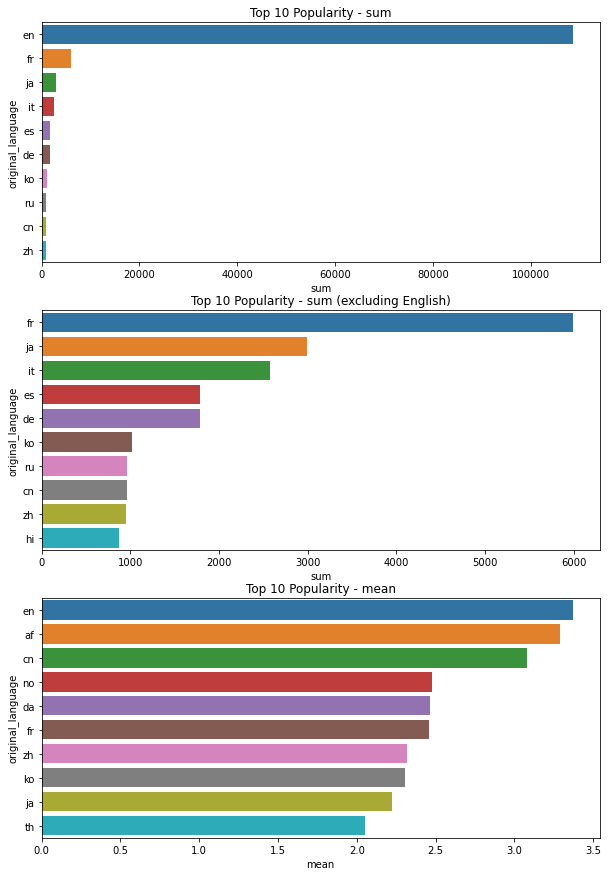

In [190]:
plt.figure(figsize=[10,15])

plt.subplot(311)
pop_data = popularity_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="original_language", data=pop_data)
plt.title("Top 10 Popularity - sum")

plt.subplot(312)
pop_data = popularity_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="original_language", data=pop_data)
plt.title("Top 10 Popularity - sum (excluding English)")

plt.subplot(313)
pop_data = popularity_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="original_language", data=pop_data)
plt.title("Top 10 Popularity - mean")

plt.show()

### Revenue

In [191]:
revenue_pivot = data.pivot_table(index='original_language', values='revenue', aggfunc={"revenue":['mean', 'sum', 'count']}).reset_index()

In [192]:
revenue_pivot.sort_values('sum', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,1.519528e+07,4.894703e+11
34,ja,1345,2.671391e+06,3.593021e+09
81,zh,408,8.198193e+06,3.344863e+09
24,fr,2437,1.102944e+06,2.687874e+09
27,hi,508,5.258316e+06,2.671225e+09
19,es,991,1.089448e+06,1.079643e+09
39,ko,444,2.181629e+06,9.686435e+08
11,cn,312,3.085018e+06,9.625258e+08
61,ru,824,9.876333e+05,8.138099e+08
15,de,1079,7.063922e+05,7.621971e+08


In [193]:
revenue_pivot.sort_values('mean', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,1.519528e+07,4.894703e+11
70,te,45,8.764064e+06,3.943829e+08
81,zh,408,8.198193e+06,3.344863e+09
69,ta,78,7.224359e+06,5.635000e+08
27,hi,508,5.258316e+06,2.671225e+09
1,af,2,4.939986e+06,9.879971e+06
11,cn,312,3.085018e+06,9.625258e+08
34,ja,1345,2.671391e+06,3.593021e+09
80,xx,33,2.583653e+06,8.526056e+07
39,ko,444,2.181629e+06,9.686435e+08


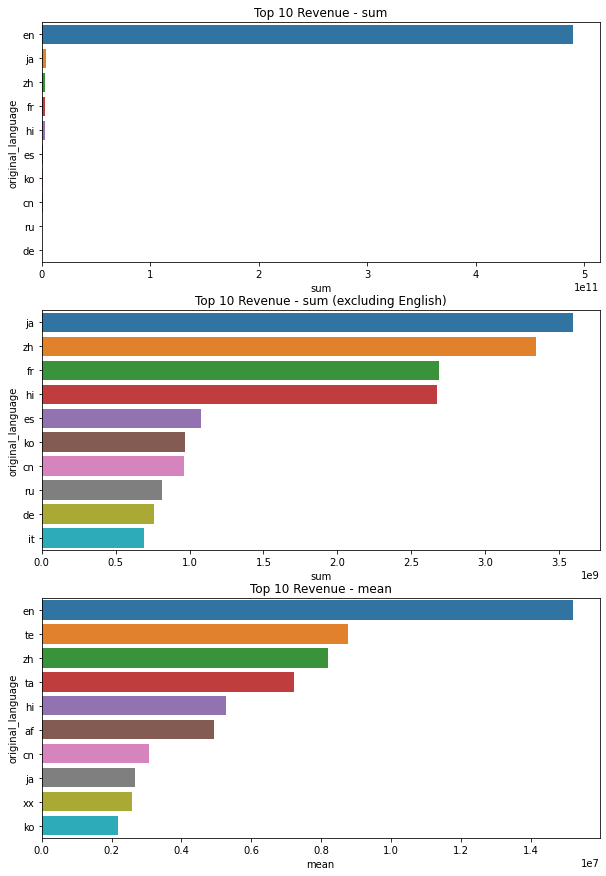

In [194]:
plt.figure(figsize=[10,15])

plt.subplot(311)
revenue_data = revenue_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="original_language", data=revenue_data)
plt.title("Top 10 Revenue - sum")

plt.subplot(312)
revenue_data = revenue_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="original_language", data=revenue_data)
plt.title("Top 10 Revenue - sum (excluding English)")

plt.subplot(313)
revenue_data = revenue_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="original_language", data=revenue_data)
plt.title("Top 10 Revenue - mean")

plt.show()

### Vote Count

In [195]:
vote_count_pivot = data.pivot_table(index='original_language', values='vote_count', aggfunc={"vote_count":['mean', 'sum', 'count']}).reset_index()

In [196]:
vote_count_pivot.sort_values('sum', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,141.776419,4566902.0
24,fr,2437,50.068937,122018.0
34,ja,1345,45.224535,60827.0
32,it,1528,34.450262,52640.0
19,es,991,31.873865,31587.0
15,de,1079,25.883225,27928.0
39,ko,444,45.977477,20414.0
11,cn,312,45.801282,14290.0
27,hi,508,24.320866,12355.0
81,zh,408,29.227941,11925.0


In [197]:
vote_count_pivot.sort_values('mean', ascending=False).head(10)

,original_language,count,mean,sum
17,en,32212,141.776419,4566902.0
30,id,20,117.250000,2345.0
51,nb,6,108.333333,650.0
1,af,2,51.000000,102.0
24,fr,2437,50.068937,122018.0
14,da,223,47.955157,10694.0
39,ko,444,45.977477,20414.0
11,cn,312,45.801282,14290.0
34,ja,1345,45.224535,60827.0
32,it,1528,34.450262,52640.0


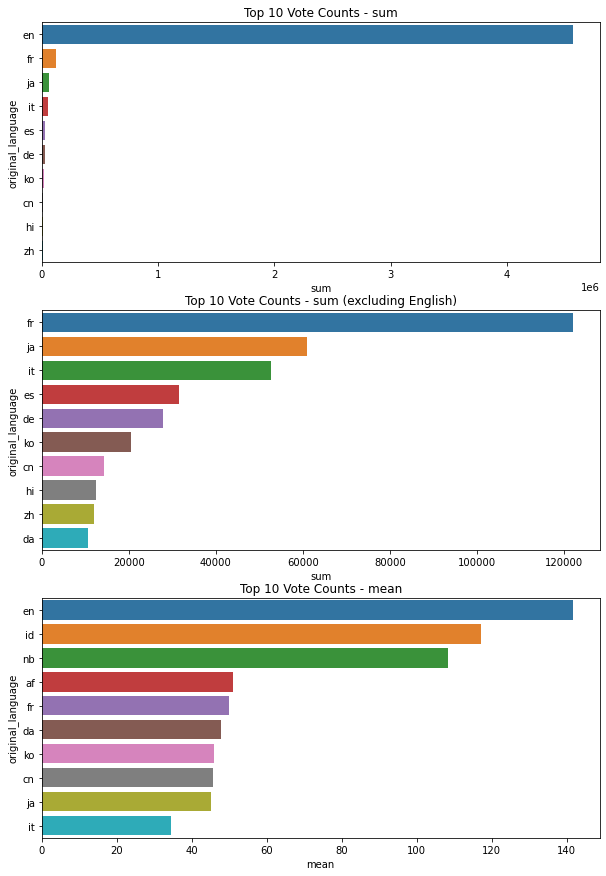

In [198]:
plt.figure(figsize=[10,15])

plt.subplot(311)
vote_data = vote_count_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="original_language", data=vote_data)
plt.title("Top 10 Vote Counts - sum")

plt.subplot(312)
vote_data = vote_count_pivot.sort_values('sum', ascending=False)[1:11]
sns.barplot(x="sum", y="original_language", data=vote_data)
plt.title("Top 10 Vote Counts - sum (excluding English)")

plt.subplot(313)
vote_data = vote_count_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="original_language", data=vote_data)
plt.title("Top 10 Vote Counts - mean")

plt.show()

## genres에 따른 budget, popularity, revenue, vote_count

In [199]:
genres_df = data[:]

In [200]:
s = data.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [201]:
gen_df = genres_df.drop('genres', axis=1).join(s)
gen_df

,adult,belongs_to_collection,budget,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre
0,False,Toy Story Collection,30000000.0,862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],...,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,Animation
0,False,Toy Story Collection,30000000.0,862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],...,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,Comedy
0,False,Toy Story Collection,30000000.0,862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],...,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0,Family
1,False,No Collection,65000000.0,8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Adventure
1,False,No Collection,65000000.0,8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],...,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,No Collection,0.0,67758.0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,Action
45463,False,No Collection,0.0,67758.0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,Drama
45463,False,No Collection,0.0,67758.0,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,[American World Pictures],[United States of America],...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,Thriller
45464,False,No Collection,0.0,227506.0,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,[Yermoliev],[Russia],...,0.0,87.0,NaN,Released,NaN,Satan Triumphant,False,0.0,0.0,NaN


In [202]:
genres=gen_df.groupby("genre")
genres.size().sort_values(ascending=False)

genre
Drama              20163
Comedy             13141
Thriller            7605
Romance             6714
Action              6580
Horror              4660
Crime               4294
Documentary         3926
Adventure           3483
Science Fiction     3039
Family              2761
Mystery             2461
Fantasy             2306
Animation           1928
Foreign             1613
Music               1595
History             1396
War                 1321
Western             1042
TV Movie             765
dtype: int64

In [203]:
budget_pivot = gen_df.pivot_table(index='genre', values='budget', aggfunc={"budget":['mean', 'sum', 'count']}).reset_index()

Text(0.5, 1.0, 'Top 10 Genres')

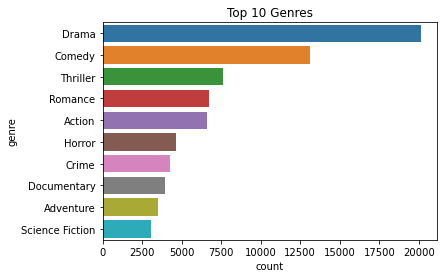

In [204]:
budget_data = budget_pivot.sort_values('count', ascending=False)[0:10]
sns.barplot(x="count", y="genre", data=budget_data)
plt.title("Top 10 Genres")

### budget

In [205]:
budget_pivot.sort_values('sum', ascending=False)[0:10]

,genre,count,mean,sum
0,Action,6580,1.180970e+07,7.770780e+10
6,Drama,20163,3.473670e+06,7.003961e+10
1,Adventure,3483,1.886412e+07,6.570373e+10
3,Comedy,13141,4.576124e+06,6.013485e+10
17,Thriller,7605,7.298923e+06,5.550831e+10
15,Science Fiction,3039,1.163694e+07,3.536467e+10
8,Fantasy,2306,1.486411e+07,3.427664e+10
7,Family,2761,1.214049e+07,3.351990e+10
4,Crime,4294,6.427564e+06,2.759996e+10
14,Romance,6714,3.877585e+06,2.603411e+10


In [206]:
budget_pivot.sort_values('mean', ascending=False)[0:10]

,genre,count,mean,sum
1,Adventure,3483,1.886412e+07,6.570373e+10
8,Fantasy,2306,1.486411e+07,3.427664e+10
7,Family,2761,1.214049e+07,3.351990e+10
0,Action,6580,1.180970e+07,7.770780e+10
15,Science Fiction,3039,1.163694e+07,3.536467e+10
2,Animation,1928,1.035139e+07,1.995749e+10
17,Thriller,7605,7.298923e+06,5.550831e+10
4,Crime,4294,6.427564e+06,2.759996e+10
10,History,1396,6.385574e+06,8.914262e+09
18,War,1321,5.909146e+06,7.805981e+09


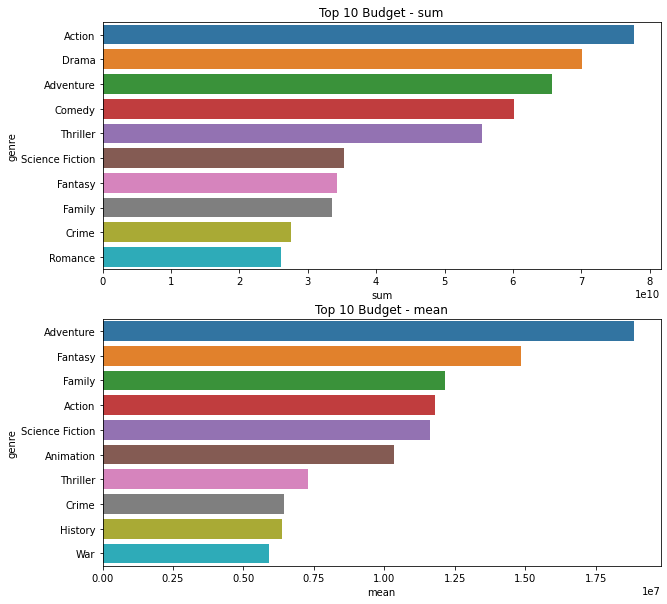

In [207]:
plt.figure(figsize=[10,10])

plt.subplot(211)
budget_data = budget_pivot.sort_values('sum', ascending=False)[0:10]
sns.barplot(x="sum", y="genre", data=budget_data)
plt.title("Top 10 Budget - sum")

plt.subplot(212)
budget_data = budget_pivot.sort_values('mean', ascending=False)[0:10]
sns.barplot(x="mean", y="genre", data=budget_data)
plt.title("Top 10 Budget - mean")

plt.show()

### Popularity

In [208]:
gen_df["popularity"]=pd.to_numeric(gen_df["popularity"],errors='coerce')

In [209]:
popularity_pivot = gen_df.pivot_table(index='genre', values='popularity', aggfunc={"popularity":['mean', 'sum','count']}).reset_index()

In [210]:
popularity_pivot.sort_values('sum', ascending=False).head(10)

,genre,count,mean,sum
6,Drama,20163,3.019556,60883.313694
3,Comedy,13141,3.238019,42550.803122
17,Thriller,7605,4.493137,34170.303633
0,Action,6580,4.777884,31438.479572
14,Romance,6714,3.127688,20999.297830
1,Adventure,3483,6.009496,20931.075531
4,Crime,4294,4.149839,17819.407654
11,Horror,4660,3.571472,16643.057595
15,Science Fiction,3039,5.005831,15212.721486
7,Family,2761,4.733293,13068.622187


In [211]:
popularity_pivot.sort_values('mean', ascending=False).head(10)

,genre,count,mean,sum
1,Adventure,3483,6.009496,20931.075531
8,Fantasy,2306,5.370663,12384.748438
15,Science Fiction,3039,5.005831,15212.721486
0,Action,6580,4.777884,31438.479572
7,Family,2761,4.733293,13068.622187
2,Animation,1928,4.708896,9078.752325
17,Thriller,7605,4.493137,34170.303633
4,Crime,4294,4.149839,17819.407654
13,Mystery,2461,3.968072,9765.424951
11,Horror,4660,3.571472,16643.057595


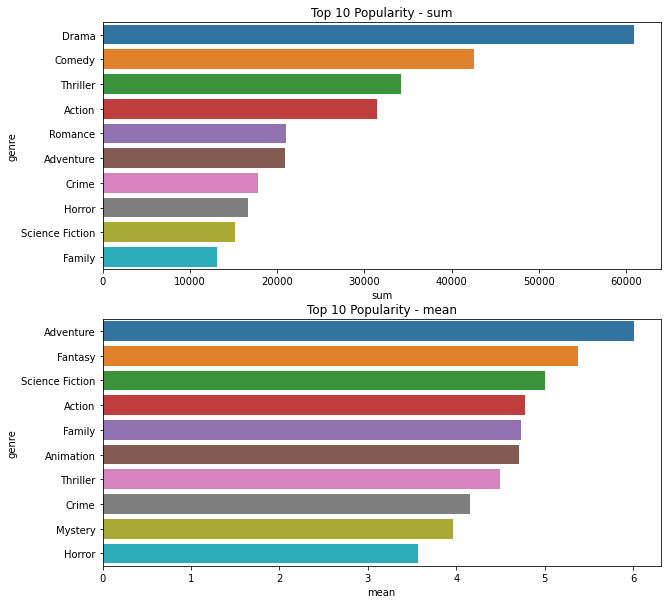

In [212]:
plt.figure(figsize=[10,10])

plt.subplot(211)
pop_data = popularity_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="genre", data=pop_data)
plt.title("Top 10 Popularity - sum")

plt.subplot(212)
pop_data = popularity_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="genre", data=pop_data)
plt.title("Top 10 Popularity - mean")

plt.show()

### Revenue

In [213]:
revenue_pivot = gen_df.pivot_table(index='genre', values='revenue', aggfunc={"revenue":['mean', 'sum', 'count']}).reset_index()

In [214]:
revenue_pivot.sort_values('sum', ascending=False).head(10)

,genre,count,mean,sum
0,Action,6580,3.060536e+07,2.013833e+11
1,Adventure,3483,5.741564e+07,1.999787e+11
3,Comedy,13141,1.269747e+07,1.668574e+11
6,Drama,20163,7.974987e+06,1.607997e+11
17,Thriller,7605,1.705921e+07,1.297353e+11
7,Family,2761,3.879028e+07,1.071000e+11
8,Fantasy,2306,4.507121e+07,1.039342e+11
15,Science Fiction,3039,3.219742e+07,9.784796e+10
14,Romance,6714,1.094298e+07,7.347118e+10
2,Animation,1928,3.497575e+07,6.743324e+10


In [215]:
revenue_pivot.sort_values('mean', ascending=False).head(10)

,genre,count,mean,sum
1,Adventure,3483,5.741564e+07,1.999787e+11
8,Fantasy,2306,4.507121e+07,1.039342e+11
7,Family,2761,3.879028e+07,1.071000e+11
2,Animation,1928,3.497575e+07,6.743324e+10
15,Science Fiction,3039,3.219742e+07,9.784796e+10
0,Action,6580,3.060536e+07,2.013833e+11
17,Thriller,7605,1.705921e+07,1.297353e+11
4,Crime,4294,1.475830e+07,6.337212e+10
13,Mystery,2461,1.412210e+07,3.475448e+10
3,Comedy,13141,1.269747e+07,1.668574e+11


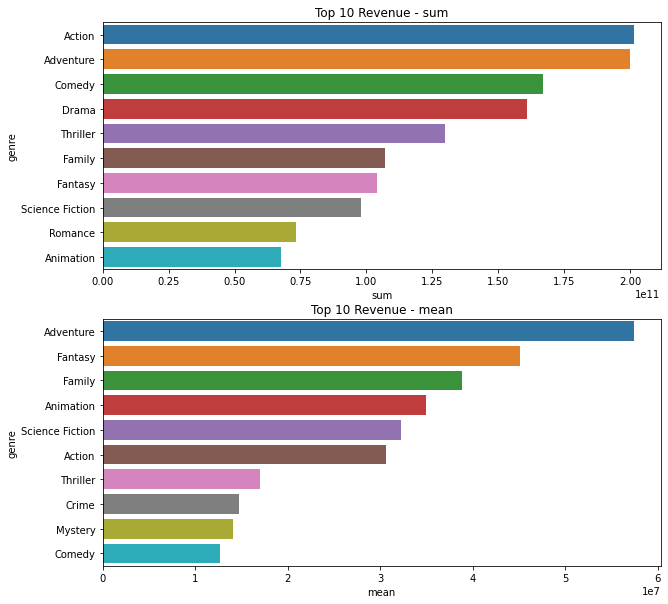

In [216]:
plt.figure(figsize=[10,10])

plt.subplot(211)
revenue_data = revenue_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="genre", data=revenue_data)
plt.title("Top 10 Revenue - sum")

plt.subplot(212)
revenue_data = revenue_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="genre", data=revenue_data)
plt.title("Top 10 Revenue - mean")

plt.show()

### Vote Count

In [217]:
vote_count_pivot = gen_df.pivot_table(index='genre', values='vote_count', aggfunc={"vote_count":['mean', 'sum', 'count']}).reset_index()

In [218]:
vote_count_pivot.sort_values('sum', ascending=False).head(10)

,genre,count,mean,sum
6,Drama,20163,96.921440,1954227.0
0,Action,6580,259.606687,1708212.0
3,Comedy,13141,109.387870,1437466.0
1,Adventure,3483,411.700258,1433952.0
17,Thriller,7605,188.471663,1433327.0
15,Science Fiction,3039,323.132609,982000.0
8,Fantasy,2306,333.590633,769260.0
4,Crime,4294,176.402655,757473.0
7,Family,2761,242.750815,670235.0
14,Romance,6714,96.099643,645213.0


In [219]:
vote_count_pivot.sort_values('mean', ascending=False).head(10)

,genre,count,mean,sum
1,Adventure,3483,411.700258,1433952.0
8,Fantasy,2306,333.590633,769260.0
15,Science Fiction,3039,323.132609,982000.0
0,Action,6580,259.606687,1708212.0
7,Family,2761,242.750815,670235.0
2,Animation,1928,234.705394,452512.0
17,Thriller,7605,188.471663,1433327.0
4,Crime,4294,176.402655,757473.0
13,Mystery,2461,166.192605,409000.0
18,War,1321,120.536715,159229.0


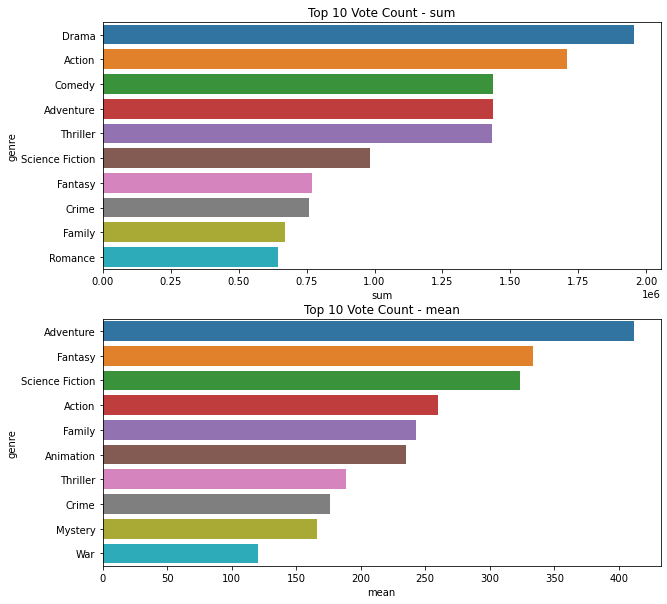

In [220]:
plt.figure(figsize=[10,10])

plt.subplot(211)
vote_data = vote_count_pivot.sort_values('sum', ascending=False).head(10)
sns.barplot(x="sum", y="genre", data=vote_data)
plt.title("Top 10 Vote Count - sum")

plt.subplot(212)
vote_data = vote_count_pivot.sort_values('mean', ascending=False).head(10)
sns.barplot(x="mean", y="genre", data=vote_data)
plt.title("Top 10 Vote Count - mean")

plt.show()

# 텍스트 마이닝

In [221]:
text_data=pd.DataFrame(data[["overview","tagline","genres"]])
text_data=text_data[pd.isnull(text_data["genres"])==False]

In [222]:
text_data

,overview,tagline,genres
0,"Led by Woody, Andy's toys live happily in his ...",NaN,"[Animation, Comedy, Family]"
1,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[Adventure, Fantasy, Family]"
2,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[Romance, Comedy]"
3,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[Comedy, Drama, Romance]"
4,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,[Comedy]
...,...,...,...
45458,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...",[Horror]
45459,It's the year 3000 AD. The world's most danger...,NaN,[Science Fiction]
45460,"Yet another version of the classic epic, with ...",NaN,"[Drama, Action, Romance]"
45461,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[Drama, Family]"


In [223]:
text_data["genres"]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45458                        [Horror]
45459               [Science Fiction]
45460        [Drama, Action, Romance]
45461                 [Drama, Family]
45463       [Action, Drama, Thriller]
Name: genres, Length: 42867, dtype: object

In [224]:
genres_type=[]

In [225]:
for genres in text_data["genres"]:
    for gen in genres:
        if gen not in genres_type:
            genres_type.append(gen)


In [226]:
genres_type

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie']

In [227]:
from collections import Counter

In [228]:
gen_list=[]
for genres in text_data["genres"]:
    for gen in genres:
        gen_list.append(gen)

In [229]:
gen_list[0:20]

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Family',
 'Romance',
 'Comedy',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Action',
 'Adventure']

In [230]:
counts=Counter(gen_list)
counts

Counter({'Animation': 1928,
         'Comedy': 13141,
         'Family': 2761,
         'Adventure': 3483,
         'Fantasy': 2306,
         'Romance': 6714,
         'Drama': 20163,
         'Action': 6580,
         'Crime': 4294,
         'Thriller': 7605,
         'Horror': 4660,
         'History': 1396,
         'Science Fiction': 3039,
         'Mystery': 2461,
         'War': 1321,
         'Foreign': 1613,
         'Music': 1595,
         'Documentary': 3926,
         'Western': 1042,
         'TV Movie': 765})

In [231]:
max_len=0
for genres in text_data["genres"]:
    if len(genres)>max_len:
        max_len=len(genres)

max_len

8

In [232]:
for genres in text_data["genres"]:
    if len(genres)==max_len:
        print(genres)

['Adventure', 'Fantasy', 'Animation', 'Action', 'Comedy', 'Thriller', 'Science Fiction', 'Family']
['Fantasy', 'Animation', 'Drama', 'Science Fiction', 'Romance', 'Foreign', 'Family', 'Comedy']
['Action', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Music', 'Thriller']


In [233]:
np.mean(pd.isnull(text_data["overview"])) 

0.01625959362679917

In [234]:
np.mean(pd.isnull(text_data["tagline"]))

0.5310378612919029

- overview가 na인 경우는 1.6%, tagline이 na인 경우는 53%
- na를 빈칸으로 바꿔서 사용

 ###  overview만 이용해서 genres 예측


In [235]:
text_data[pd.isnull(text_data["overview"])==True]["overview"]

32       NaN
300      NaN
634      NaN
635      NaN
641      NaN
        ... 
45342    NaN
45377    NaN
45398    NaN
45399    NaN
45410    NaN
Name: overview, Length: 697, dtype: object

In [236]:
na_ind=pd.isnull(text_data["overview"])==True
text_data.loc[na_ind,"overview"] = ""

In [237]:
text_data[pd.isnull(text_data["overview"])==True]["overview"]

Series([], Name: overview, dtype: object)

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_data["overview"], text_data["genres"], 
                                                    test_size=0.2, random_state=42)


In [239]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(34293,)
(34293,)
(8574,)
(8574,)


In [240]:
X_train = X_train.reset_index()["overview"]
X_test = X_test.reset_index()["overview"]
y_train = y_train.reset_index()["genres"]
y_test = y_test.reset_index()["genres"]

In [241]:
X_train

0        General Fitzhugh, an ageing Lothario has an ov...
1        Bruno loves his wife Maxine, but his love and ...
2        After years working as a border patrolman, Jos...
3        A nurse and her surgeon-lover are part of a re...
4        Two young men, one rich, one middle class, bot...
                               ...                        
34288    To prevent a world war from breaking out, famo...
34289    A young teacher inspires her class of at-risk ...
34290    Tommaso Scalia is a man who commits three murd...
34291    Young Dorothy finds herself in a magical world...
34292    Michael Firch is very skilled in computers and...
Name: overview, Length: 34293, dtype: object

In [242]:
y_train

0                                            [Comedy]
1                                   [Drama, Thriller]
2                                             [Drama]
3                                    [Drama, Romance]
4                       [Action, Drama, Romance, War]
                             ...                     
34288    [Fantasy, Action, Thriller, Science Fiction]
34289                                  [Crime, Drama]
34290                                         [Drama]
34291                    [Adventure, Family, Fantasy]
34292           [Adventure, Comedy, Fantasy, Romance]
Name: genres, Length: 34293, dtype: object

In [243]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()

In [244]:
multilabel_binarizer.fit(y_train)
y_train_oe = multilabel_binarizer.transform(y_train)

In [245]:
multilabel_binarizer.fit(y_test)
y_test_oe = multilabel_binarizer.transform(y_test)

In [246]:
for i in range(5):
    print(y_train[i])
    print(y_train_oe[i],"\n")

['Comedy']
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Thriller']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] 

['Drama']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Romance']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0] 

['Action', 'Drama', 'Romance', 'War']
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0] 



In [247]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(stop_words="english")

In [248]:
#train

In [249]:
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)
X_train_tfidf_vect.shape

(34293, 65514)

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [251]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [252]:
clf.fit(X_train_tfidf_vect, y_train_oe)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


OneVsRestClassifier(estimator=LogisticRegression())

In [253]:
pred_train=clf.predict(X_train_tfidf_vect)
pred_genres_train=multilabel_binarizer.inverse_transform(pred_train)

In [254]:
pred_genres_train[0:20]

[('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Drama', 'Romance'),
 ('Comedy',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Documentary',),
 ('Drama',),
 ('Music',),
 ('Drama',),
 ('Drama',),
 (),
 (),
 ('Drama',)]

In [255]:
accuracy_score(y_train_oe, pred_train)

0.25290875688916103

In [256]:
f1_score(y_train_oe, pred_train, average="micro")

0.5592168808975406

In [257]:
#test

In [258]:
X_test_tfidf_vect=tfidf_vect.transform(X_test)
X_test_tfidf_vect.shape

(8574, 65514)

In [259]:
pred_test=clf.predict(X_test_tfidf_vect)
pred_genres_test=multilabel_binarizer.inverse_transform(pred_test)

In [260]:
accuracy_score(y_test_oe, pred_test)

0.18754373687893633

In [261]:
f1_score(y_test_oe, pred_test, average="micro")

0.46330466411548515

정확도는 떨어짐. 모든 장르가 같게 예측되어야 옳게 분류된 것으로 보기 때문.

### 해결 방법 1: decision threshold를 낮춘다

In [262]:
#train

In [263]:
clf.predict_proba(X_train_tfidf_vect)

array([[0.09773301, 0.03751082, 0.01794111, ..., 0.07763693, 0.0203805 ,
        0.02526564],
       [0.06237304, 0.02231693, 0.0326623 , ..., 0.20071965, 0.0158572 ,
        0.00954155],
       [0.08552517, 0.05381511, 0.02366371, ..., 0.12834334, 0.04252555,
        0.01506943],
       ...,
       [0.20078479, 0.02660671, 0.01837857, ..., 0.30293883, 0.00898194,
        0.04645939],
       [0.07453522, 0.31972128, 0.30319858, ..., 0.03199989, 0.00814872,
        0.02522304],
       [0.11651859, 0.26585396, 0.04387484, ..., 0.09008051, 0.01423304,
        0.00994323]])

In [264]:
clf.predict_proba(X_train_tfidf_vect)[5]

array([0.09766008, 0.0554361 , 0.03711857, 0.52867231, 0.15332641,
       0.14569616, 0.30267336, 0.05100432, 0.03233032, 0.01528231,
       0.01977148, 0.05728988, 0.07261807, 0.04176461, 0.08480326,
       0.05523047, 0.01702867, 0.0894302 , 0.00820631, 0.01896097])

In [265]:
print(pred_train[5])
print(y_train_oe[5])

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [266]:
print(pred_genres_train[5])
print(y_train[5])

('Comedy',)
['Comedy', 'Drama', 'Crime']


기준을 0.3으로 낮춰보면

In [267]:
prob_train = clf.predict_proba(X_train_tfidf_vect)

new_pred_train = (prob_train >= 0.3).astype(int)

In [268]:
print(new_pred_train[5])
print(y_train_oe[5])

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [269]:
new_pred_genres_train=multilabel_binarizer.inverse_transform(new_pred_train)

In [270]:
accuracy_score(y_train_oe, new_pred_train)

0.2660309684192109

In [271]:
f1_score(y_train_oe, new_pred_train, average="micro")

0.6875117383955092

In [272]:
#test

In [273]:
clf.predict_proba(X_test_tfidf_vect)

array([[0.06654023, 0.04813873, 0.03443253, ..., 0.04461443, 0.01350475,
        0.01105429],
       [0.10847897, 0.07111939, 0.04751479, ..., 0.11312403, 0.01930651,
        0.01792832],
       [0.01634912, 0.02153399, 0.01402249, ..., 0.04264818, 0.02019381,
        0.00890216],
       ...,
       [0.00734607, 0.00760388, 0.01746339, ..., 0.01467087, 0.0101123 ,
        0.00589358],
       [0.11154863, 0.02826726, 0.05435625, ..., 0.14200778, 0.01217582,
        0.01581689],
       [0.45295257, 0.1058758 , 0.03816299, ..., 0.13268871, 0.02196581,
        0.03144585]])

In [274]:
clf.predict_proba(X_test_tfidf_vect)[1]

array([0.10847897, 0.07111939, 0.04751479, 0.3769959 , 0.07298559,
       0.07226138, 0.40943703, 0.04996626, 0.04299898, 0.03296089,
       0.02947181, 0.06888293, 0.02931334, 0.0375853 , 0.10647675,
       0.05016457, 0.01622002, 0.11312403, 0.01930651, 0.01792832])

In [275]:
print(pred_test[1])
print(y_test_oe[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [276]:
prob_test = clf.predict_proba(X_test_tfidf_vect)

new_pred_test = (prob_test >= 0.3).astype(int)

In [277]:
new_pred_genres_test=multilabel_binarizer.inverse_transform(new_pred_test)

In [278]:
accuracy_score(y_test_oe, new_pred_test)

0.1668999300209937

In [279]:
f1_score(y_test_oe, new_pred_test, average="micro")

0.5766268934585767

### 해결 방법2: 실제 장르 중 50% 이상 겹치면 맞춘 것으로 인정한다

In [280]:
#train

In [281]:
for i in range(5):
    print("실제")
    print(y_train_oe[i])
    print(y_train[i])
    print("예측")
    print(pred_train[i])
    print(pred_genres_train[i],"\n")

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
['Drama', 'Thriller']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Drama']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
['Action', 'Drama', 'Romance', 'War']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
('Drama', 'Romance') 



In [282]:
print(pred_genres_train[7])
print(y_train[7])

('Comedy',)
['Fantasy', 'Adventure', 'Comedy', 'Family']


그치만 이렇게 장르가 여러가지인 경우, 50% 이상 맞게 예측한다면 옳게 예측되었다고 하자

In [283]:
pred_genres_train[0:10]

[('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Drama', 'Romance'),
 ('Comedy',),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',)]

In [284]:
over_50=[]

for i in range(len(y_train)):
    over50=[]
    for pred in pred_genres_train[i]:
        if pred in y_train[i]:
            over50.append(1)
        else:
            over50.append(0)
    over_50.append(over50)
            
            

In [285]:
over_50[1:10]

[[1], [1], [1], [1, 1], [1], [1], [1], [1], [1]]

In [286]:
count=0

for i in range(len(over_50)):
    if np.sum(over_50[i])>=0.5*len(y_train[i]):
        count+=1

print("실제 장르의 50% 이상을 맞춘 경우:")
print("총", len(over_50), "개의 데이터 중", count, "개\n")
    
for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_train[i], '-> 옳게 예측된 장르 개수:', np.sum(over_50[i]))
    print('  - 실제 장르:', y_train[i],'-> 실제 장르 개수:', len(y_train[i]),'\n')

실제 장르의 50% 이상을 맞춘 경우:
총 34293 개의 데이터 중 18758 개

  - index: 0
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 1
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Thriller'] -> 실제 장르 개수: 2 

  - index: 2
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama', 'Romance') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Action', 'Drama', 'Romance', 'War'] -> 실제 장르 개수: 4 

  - index: 5
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy', 'Drama', 'Crime'] -> 실제 장르 개수: 3 

  - index: 6
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 7
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Fantasy', 'Adventure', 'Comedy', 'Family'] -> 실제 장르 개수: 4 

  - index: 8
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'C

In [287]:
count

18758

In [288]:
count/len(over_50)

0.5469920975126119

In [289]:
#test

In [290]:
for i in range(5):
    print("실제")
    print(y_test_oe[i])
    print(y_test[i])
    print("예측")
    print(pred_test[i])
    print(pred_genres_test[i],"\n")

실제
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance', 'Comedy']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 

실제
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Action', 'Comedy', 'Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy', 'Drama') 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 

실제
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']
예측
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Comedy',) 



In [291]:
print(pred_genres_test[4])
print(y_test[4])

('Comedy',)
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']


In [292]:
pred_genres_test[0:10]

[('Comedy',),
 (),
 ('Comedy', 'Drama'),
 ('Drama',),
 ('Comedy',),
 ('Drama',),
 ('Drama',),
 ('Drama',),
 ('Action', 'Science Fiction'),
 ('Drama',)]

In [293]:
over_50_test=[]

for i in range(len(y_test)):
    over50=[]
    for pred in pred_genres_test[i]:
        if pred in y_test[i]:
            over50.append(1)
        else:
            over50.append(0)
    over_50_test.append(over50)

In [294]:
over_50_test[0:10]

[[1], [], [1, 0], [1], [1], [1], [0], [1], [1, 1], [0]]

In [295]:
count=0

for i in range(len(over_50_test)):
    if np.sum(over_50_test[i])>=0.5*len(y_test[i]):
        count+=1

print("실제 장르의 50% 이상을 맞춘 경우:")
print("총", len(over_50_test), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_test[i], '-> 옳게 예측된 장르 개수:', np.sum(over_50_test[i]))
    print('  - 실제 장르:', y_test[i],'-> 실제 장르 개수:', len(y_test[i]),'\n')

실제 장르의 50% 이상을 맞춘 경우:
총 8574 개의 데이터 중 3951 개

  - index: 0
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance', 'Comedy'] -> 실제 장르 개수: 3 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Action', 'Comedy', 'Drama'] -> 실제 장르 개수: 3 

  - index: 2
  - 예측된 장르: ('Comedy', 'Drama') -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Comedy',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Romance', 'Animation', 'Family', 'Comedy', 'Adventure'] -> 실제 장르 개수: 5 

  - index: 5
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Comedy', 'Drama'] -> 실제 장르 개수: 2 

  - index: 6
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 7
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['History', 'Drama'] -> 실제 장르 개수: 2 

  - index: 8
  - 예측된 장르: ('Action', 'Science Fiction') -> 옳게 예측된 장르 개수: 2
  - 실제 장

In [296]:
count

3951

In [297]:
count/len(over_50_test)

0.4608117564730581

 ##  tagline 이용해서 genres 예측


In [298]:
na_ind=pd.isnull(text_data["tagline"])==True
text_data.loc[na_ind,"tagline"] = ""

In [299]:
text_data[pd.isnull(text_data["tagline"])==True]["tagline"]

Series([], Name: tagline, dtype: object)

In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_data["tagline"], text_data["genres"], 
                                                    test_size=0.2, random_state=42)

In [301]:
X_train = X_train.reset_index()["tagline"]
X_test = X_test.reset_index()["tagline"]
y_train = y_train.reset_index()["genres"]
y_test = y_test.reset_index()["genres"]

In [302]:
X_train

0                                                         
1                                                         
2                                                         
3                                                         
4        Youth, hitting the clouds! Laughing at danger!...
                               ...                        
34288           The power of seven become a league of one.
34289              Their story. Their world. Their future.
34290                                                     
34291    We're off to see the Wizard, the wonderful Wiz...
34292                                                     
Name: tagline, Length: 34293, dtype: object

In [303]:
y_train

0                                            [Comedy]
1                                   [Drama, Thriller]
2                                             [Drama]
3                                    [Drama, Romance]
4                       [Action, Drama, Romance, War]
                             ...                     
34288    [Fantasy, Action, Thriller, Science Fiction]
34289                                  [Crime, Drama]
34290                                         [Drama]
34291                    [Adventure, Family, Fantasy]
34292           [Adventure, Comedy, Fantasy, Romance]
Name: genres, Length: 34293, dtype: object

In [304]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(y_train)
y_train_oe = multilabel_binarizer.transform(y_train)

In [305]:
multilabel_binarizer.fit(y_test)
y_test_oe = multilabel_binarizer.transform(y_test)

In [306]:
for i in range(5):
    print(y_train[i])
    print(y_train_oe[i],"\n")

['Comedy']
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Thriller']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0] 

['Drama']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 

['Drama', 'Romance']
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0] 

['Action', 'Drama', 'Romance', 'War']
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0] 



In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(stop_words="english")

In [308]:
#train

In [309]:
tfidf_vect.fit(X_train)
X_train_tfidf_vect=tfidf_vect.transform(X_train)


In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [311]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [312]:
clf.fit(X_train_tfidf_vect, y_train_oe)
pred_train=clf.predict(X_train_tfidf_vect)
pred_genres_train=multilabel_binarizer.inverse_transform(pred_train)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [313]:
pred_genres_train[0:20]

[(),
 (),
 (),
 (),
 ('Drama',),
 (),
 (),
 (),
 ('Drama', 'Romance'),
 (),
 ('Drama',),
 (),
 ('Drama',),
 (),
 (),
 (),
 ('Drama',),
 ('Drama',),
 (),
 ()]

In [314]:
list(X_train)[0:20]

['',
 '',
 '',
 '',
 "Youth, hitting the clouds! Laughing at danger! Fighting, loving, dodging death! That's",
 "'Til death do they party...",
 'Too beautiful to die. Too wild to live.',
 '',
 'You never choose love. Love chooses you.',
 "Ask her no questions, she'll tell you no lies. Ask her too many and somebody dies.",
 'The most WANTED picture of the year!',
 '',
 'During an anti-war protest on May 4, 1970, four students are shot and killed at Kent State in Ohio.',
 '',
 '',
 '',
 'A quite place in the country, where reality and fantasy are too close',
 "She's Every Big-Time Rodeo Prize Rolled Into One ...pair of tight pants!",
 '',
 '']

예측 장르에 빈 튜플이 많은 이유는 애초에 tagline에 빈 칸이 많기 때문

In [315]:
accuracy_score(y_train_oe, pred_train)

0.05671711427988219

In [316]:
f1_score(y_train_oe, pred_train, average="micro")

0.22931747673216132

In [317]:
#test

In [318]:
X_test_tfidf_vect=tfidf_vect.transform(X_test)
X_test_tfidf_vect.shape

(8574, 11024)

In [319]:
pred_test=clf.predict(X_test_tfidf_vect)
pred_genres_test=multilabel_binarizer.inverse_transform(pred_test)

In [320]:
accuracy_score(y_test_oe, pred_test)

0.04187077210170282

In [321]:
f1_score(y_test_oe, pred_test, average="micro")

0.18183549124143183

정확도가 overview에 비해 떨어짐. 

### 해결 방법 1: decision threshold를 낮춘다

In [322]:
#train

In [323]:
clf.predict_proba(X_train_tfidf_vect)[5]

array([0.17085212, 0.05293154, 0.02354324, 0.40466698, 0.20356531,
       0.04573882, 0.32175139, 0.0247183 , 0.04333257, 0.02509459,
       0.01911916, 0.41378956, 0.01398864, 0.1400357 , 0.0678473 ,
       0.06249603, 0.01604847, 0.19541921, 0.01664514, 0.0179728 ])

In [324]:
print(pred_train[5])
print(y_train_oe[5])
print(pred_genres_train[5])
print(y_train[5])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
()
['Comedy', 'Drama', 'Crime']


기준을 0.2로 낮춰보면

In [325]:
prob_train = clf.predict_proba(X_train_tfidf_vect)

new_pred_train = (prob_train >= 0.2).astype(int)

In [326]:
print(new_pred_train[5])
print(y_train_oe[5])

[0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [327]:
new_pred_genres_train=multilabel_binarizer.inverse_transform(new_pred_train)

In [328]:
accuracy_score(y_train_oe, new_pred_train)

0.055988102528212756

In [329]:
f1_score(y_train_oe, new_pred_train, average="micro")

0.4990073210075692

In [330]:
#test

In [331]:
prob_test = clf.predict_proba(X_test_tfidf_vect)

new_pred_test = (prob_test >= 0.2).astype(int)

In [332]:
new_pred_genres_test=multilabel_binarizer.inverse_transform(new_pred_test)

In [333]:
accuracy_score(y_test_oe, new_pred_test)

0.039771401912759505

In [334]:
f1_score(y_test_oe, new_pred_test, average="micro")

0.44541462927851516

### 해결 방법2: 실제 장르 중 33% 이상 겹치면 맞춘 것으로 인정한다

In [335]:
#train

In [336]:
for i in range(5):
    print("실제")
    print(y_train_oe[i])
    print(y_train[i])
    print("예측")
    print(pred_train[i])
    print(pred_genres_train[i],"\n")

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
['Drama', 'Thriller']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]
['Action', 'Drama', 'Romance', 'War']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 



In [337]:
print(pred_genres_train[4])
print(y_train[4])

('Drama',)
['Action', 'Drama', 'Romance', 'War']


그치만 이렇게 장르가 여러가지인 경우, 33% 이상 맞게 예측한다면 옳게 예측되었다고 하자

In [338]:
over_33=[]

for i in range(len(y_train)):
    over33=[]
    for pred in pred_genres_train[i]:
        if pred in y_train[i]:
            over33.append(1)
        else:
            over33.append(0)
    over_33.append(over33)
            

In [339]:
over_33[0:20]

[[],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [1, 1],
 [],
 [0],
 [],
 [0],
 [],
 [],
 [],
 [1],
 [1],
 [],
 []]

In [340]:
count=0

for i in range(len(over_33)):
    if np.sum(over_33[i])>=len(y_train[i])/3:
        count+=1

print("실제 장르의 33% 이상을 맞춘 경우:")
print("총", len(over_33), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_train[i], '-> 옳게 예측된 장르 개수:', np.sum(over_33[i]))
    print('  - 실제 장르:', y_train[i],'-> 실제 장르 개수:', len(y_train[i]),'\n')

실제 장르의 33% 이상을 맞춘 경우:
총 34293 개의 데이터 중 7436 개

  - index: 0
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Thriller'] -> 실제 장르 개수: 2 

  - index: 2
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Action', 'Drama', 'Romance', 'War'] -> 실제 장르 개수: 4 

  - index: 5
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy', 'Drama', 'Crime'] -> 실제 장르 개수: 3 

  - index: 6
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 7
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Fantasy', 'Adventure', 'Comedy', 'Family'] -> 실제 장르 개수: 4 

  - index: 8
  - 예측된 장르: ('Drama', 'Romance') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Drama', 'Comedy', 'Romance'] -> 실제 장르 개수: 3 

  - index:

In [341]:
count

7436

In [342]:
count/len(over_33)

0.21683725541655732

In [343]:
#test

In [344]:
for i in range(5):
    print("실제")
    print(y_test_oe[i])
    print(y_test[i])
    print("예측")
    print(pred_test[i])
    print(pred_genres_test[i],"\n")

실제
[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance', 'Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Action', 'Comedy', 'Drama']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['Comedy']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
['Drama', 'Romance']
예측
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
() 

실제
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']
예측
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
('Drama',) 



In [345]:
print(pred_genres_test[4])
print(y_test[4])

('Drama',)
['Romance', 'Animation', 'Family', 'Comedy', 'Adventure']


In [346]:
over_33_test=[]

for i in range(len(y_test)):
    over33=[]
    for pred in pred_genres_test[i]:
        if pred in y_test[i]:
            over33.append(1)
        else:
            over33.append(0)
    over_33_test.append(over33)
            
            

In [347]:
over_33_test[0:20]

[[],
 [],
 [],
 [],
 [0],
 [1, 1],
 [],
 [1],
 [1],
 [],
 [],
 [],
 [],
 [],
 [],
 [1],
 [],
 [],
 [],
 [1]]

In [348]:
count=0

for i in range(len(over_33_test)):
    if np.sum(over_33_test[i])>=len(y_test[i])/3:
        count+=1

print("실제 장르의 33% 이상을 맞춘 경우:")
print("총", len(over_33_test), "개의 데이터 중", count, "개\n")

for i in range(10):
    print("  - index:",i)
    print('  - 예측된 장르:', pred_genres_test[i], '-> 옳게 예측된 장르 개수:', np.sum(over_33_test[i]))
    print('  - 실제 장르:', y_test[i],'-> 실제 장르 개수:', len(y_test[i]),'\n')

실제 장르의 33% 이상을 맞춘 경우:
총 8574 개의 데이터 중 1495 개

  - index: 0
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance', 'Comedy'] -> 실제 장르 개수: 3 

  - index: 1
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Action', 'Comedy', 'Drama'] -> 실제 장르 개수: 3 

  - index: 2
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 3
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Drama', 'Romance'] -> 실제 장르 개수: 2 

  - index: 4
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 0
  - 실제 장르: ['Romance', 'Animation', 'Family', 'Comedy', 'Adventure'] -> 실제 장르 개수: 5 

  - index: 5
  - 예측된 장르: ('Comedy', 'Drama') -> 옳게 예측된 장르 개수: 2
  - 실제 장르: ['Comedy', 'Drama'] -> 실제 장르 개수: 2 

  - index: 6
  - 예측된 장르: () -> 옳게 예측된 장르 개수: 0.0
  - 실제 장르: ['Comedy'] -> 실제 장르 개수: 1 

  - index: 7
  - 예측된 장르: ('Drama',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['History', 'Drama'] -> 실제 장르 개수: 2 

  - index: 8
  - 예측된 장르: ('Science Fiction',) -> 옳게 예측된 장르 개수: 1
  - 실제 장르: ['Action', 'Horror', 'Science Fi

In [349]:
count

1495

In [350]:
count/len(over_33_test)

0.17436435735945882

# 영화 추천 알고리즘 - 예진님(´▽`ʃ♡ƪ)

In [351]:
data.head(3)

,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",862.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,False,No Collection,65000000.0,"[Adventure, Fantasy, Family]",8844.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,Grumpy Old Men Collection,0.0,"[Romance, Comedy]",15602.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",...,1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [352]:
m=data['vote_count'].quantile(q=0.9)

In [353]:
data_filtered = data[data['vote_count']>m]

In [354]:
data_filtered.shape

(4516, 21)

In [355]:
data['vote_count'].astype('int')

0        5415
1        2413
2          92
3          34
4         173
         ... 
45460      26
45461       1
45463       6
45464       0
45465       0
Name: vote_count, Length: 45298, dtype: int32

In [356]:
def movie_score(x):
    v=x['vote_count']
    m=data['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=data['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

In [357]:
data_filtered['score']=movie_score(data_filtered)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [358]:
highscore = data_filtered.sort_values(by='score', ascending=False).head(10)

In [359]:
highscore[['title', 'vote_count', 'vote_average', 'popularity', 'score']]

,title,vote_count,vote_average,popularity,score
314,The Shawshank Redemption,8358.0,8.5,51.645403,8.445534
834,The Godfather,6024.0,8.5,41.109264,8.424980
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,34.457024,8.418006
12481,The Dark Knight,12269.0,8.3,123.167259,8.265262
2843,Fight Club,9678.0,8.3,63.869599,8.256114
292,Pulp Fiction,8670.0,8.3,140.950236,8.251104
522,Schindler's List,4436.0,8.3,41.725123,8.206069
23673,Whiplash,4376.0,8.3,64.299990,8.204827
5481,Spirited Away,3968.0,8.3,41.048867,8.195423
2211,Life Is Beautiful,3643.0,8.3,39.394970,8.186488


In [360]:
data_popular = data.sort_values('popularity', ascending=False)

In [361]:
data_popular[['title', 'vote_count', 'vote_average', 'popularity']].head(10)

,title,vote_count,vote_average,popularity
30700,Minions,4729.0,6.4,547.488298
33356,Wonder Woman,5025.0,7.2,294.337037
42222,Beauty and the Beast,5530.0,6.8,287.253654
43644,Baby Driver,2083.0,7.2,228.032744
24455,Big Hero 6,6289.0,7.8,213.849907
26564,Deadpool,11444.0,7.4,187.860492
26566,Guardians of the Galaxy Vol. 2,4858.0,7.6,185.330992
14551,Avatar,12114.0,7.2,185.070892
24351,John Wick,5499.0,7.0,183.870374
23675,Gone Girl,6023.0,7.9,154.801009


## (+) Credits.csv

In [363]:
cred = pd.read_csv('D:/ESAA/project/data/credits.csv')

In [364]:

cred["id"].describe()

count     45476.000000
mean     108345.997537
std      112443.796536
min           2.000000
25%       26443.250000
50%       60002.500000
75%      157302.000000
max      469172.000000
Name: id, dtype: float64

In [365]:

cred["id"]=pd.to_numeric(cred["id"],errors='coerce')

In [366]:
pd.value_counts(cred["id"])

141971    3
187156    2
152795    2
99080     2
24026     2
         ..
19164     1
29403     1
31450     1
25305     1
276895    1
Name: id, Length: 45432, dtype: int64

In [367]:

cred=cred.drop_duplicates(["id"],keep="first")

In [368]:

np.sum(cred.duplicated(["id"]))

0

In [369]:

mc = pd.merge(cred, data, on='id')

In [370]:
mc.head(2)

,cast,crew,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,Toy Story Collection,30000000.0,"[Animation, Comedy, Family]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,[English],Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,No Collection,65000000.0,"[Adventure, Fantasy, Family]",en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [371]:

mc['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

NaN을 공백으로 바꾸기

In [372]:

mc['overview'].isnull().sum()

954

In [373]:
mc['overview'].fillna(' ', inplace=True)


TF-IDF Matrix 만들기

In [374]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [375]:
# 램크기가 작아서 오류가 뜨는데 일단은 그냥 함
tfidfv = TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix = tfidfv.fit_transform(mc['overview'])
tfidfv_matrix.todense().shape

MemoryError: Unable to allocate 25.5 GiB for an array with shape (45297, 75584) and data type float64

(45420, 75824) => 45420개의 영화를 설명하기 위해 75824개의 단어들이 사용되었다는 것을 알 수 있다.

Similarity Score 계산하기 -> 유사한 영화들을 추측할 수 있음

In [ ]:

cosine_sim1 = linear_kernel(tfidfv_matrix, tfidfv_matrix)
cosine_sim1.shape 
#이것도 램크기가 작아서 그런데, 어쨌든 (45420, 45420)의 정방형 코사인 similarity matrix가 완성됨

영화 제목 입력하면 비슷한 영화 10개 추측

In [ ]:
indices=pd.Series(data=list(mc.index), index= mc['title'] )

In [ ]:
indices.head()

In [ ]:
# 영화 제목을 넣으면 비슷한 10개의 영화들을 예측(추천)하는 방식의 함수
def content_recommendations(title, cosine_sim):
    
    # 영화제목에 해당하는 인덱스를 설정
    idx = indices[title]
    
    # Pairwsie similarity scores 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # similarity scores로 영화 sort!
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # 비슷한 영화 10개 점수 구하기
    sim_scores=sim_scores[1:11]
    
    # 영화 인덱스 찾고
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Top 10 
    tit=[]
    for x in ind:
        tit.append(mc.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

In [ ]:
mc['title']

In [ ]:
content_recommendations("Father of the Bride Part II", cosine_sim1)

In [ ]:
content_recommendations('Grumpier Old Men',cosine_sim1)

♣ 심화적으로 영화 감독, 캐스팅, 장르에 기반한 분석을 추가한다.

### Cast 전처리

In [ ]:
mc['cast']

In [ ]:
cast = []
for string in mc['cast']:
    cast_list = eval(str(string))
    if type(string)==float:
        cast.append(float('Nan'))
    else:
        cast2 = []
        for cast_dict in cast_list:
            cast_name = cast_dict["name"]
            cast2.append(cast_name)
        cast.append(cast2)

In [ ]:
mc['cast'] = cast

In [ ]:
mc['cast']

In [ ]:
mc[mc['crew']=='[]'].index

In [ ]:

type(mc['crew'][189])

In [ ]:
mc['crew'] = mc['crew'].astype('str')

In [ ]:

eval(mc['crew'][0])

In [ ]:
# crew에서 name만 리스트로 추출하는 과정
crew1 = []
for string in mc['crew']:
    crew_list = eval(string)
    if type(string)==float:
        crew1.append(float('Nan'))
    else:
        crew2 = []
        for crew_dict in crew_list:
            crew_name = crew_dict["name"]
            crew2.append(crew_name)
        crew1.append(crew2)

In [ ]:
# float 때문에 iteration이 되지 않아서 작업해줌
mc["cast"].loc[mc["cast"].isnull()] = mc["cast"].loc[mc["cast"].isnull()].apply(lambda x:[])
mc["crew"].loc[mc["crew"].isnull()] = mc["crew"].loc[mc["crew"].isnull()].apply(lambda x:[])
mc["genres"].loc[mc["genres"].isnull()] = mc["genres"].loc[mc["genres"].isnull()].apply(lambda x:[])

In [ ]:
# name 중에서 director만 리스트로 추출하는 과정
crew = []
for i in range(len(crew1)):
    crew.append(' '.join(crew1[i][:1]))

In [ ]:

mc['crew']= crew

In [ ]:
# top3 actors를 추출하는 과정
actor= []
for i in range(len(mc['cast'])):
    actor.append(mc['cast'][i][:3])

In [ ]:
# top3 genres를 추출하는 과정
genres= []
for i in range(len(mc['genres'])):
    genres.append(mc['genres'][i][:3])

In [ ]:
mc['director'] = mc['crew']
mc['actor'] = actor
mc['genres'] = genres

In [ ]:

mc[['title', 'actor', 'director', 'genres']].head(10)

이름을 구분하기 위해 처리하는 과정 (lowercase와 공백제거 활용)

In [ ]:
def clean_director(x):
    return x.lower().replace(' ','')

In [ ]:

mc['director'] = mc['director'].apply(lambda x:clean_director(x))

In [ ]:
actor2 = []
for i in range(len(mc['actor'])):
    actor3 = []
    for j in range(len(mc['actor'][i])):
        actor3.append(mc['actor'][i][j].lower().replace(' ', ''))
    actor2.append(actor3)

In [ ]:
mc['actor'] = actor2

In [ ]:

genres2 = []
for i in range(len(mc['genres'])):
    genres3 = []
    for j in range(len(mc['genres'][i])):
        genres3.append(mc['genres'][i][j].lower())
    genres2.append(genres3)

In [ ]:
mc['genres'] = genres2

In [ ]:
mc[['title', 'actor', 'director', 'genres']].head(5)

soup열 생성

In [ ]:
def create_soup(x):
    return ' '.join(x['actor']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [ ]:

mc['soup'] = mc.apply(create_soup, axis=1)


CountVectorizer() 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(mc['soup'])


Similarity Score 계산

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [ ]:
content_recommendations('The Dark Knight Rises', cosine_sim2)

In [ ]:
content_recommendations('The Godfather', cosine_sim2)


앞에서 사용했던 content_recommendation 함수를 활용하면 앞서 사용했던 similarity score보다 더 정교한 추천 및 예측을 할 수 있다.

# 회귀 - 정현님(´▽`ʃ♡ƪ)

<AxesSubplot:>

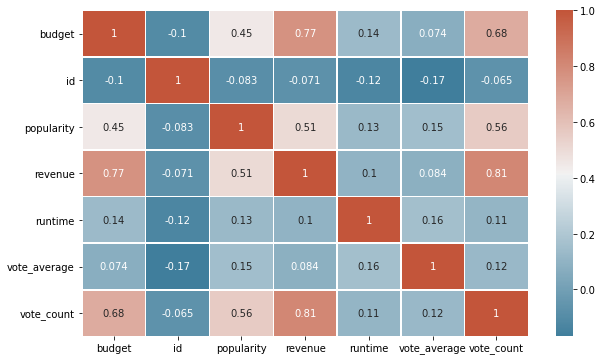

In [376]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

correlations = data.corr()
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlations, annot= True, cmap=cmap, linewidth=.5)

In [377]:

data["revenue"]=pd.to_numeric(data["revenue"])

<AxesSubplot:>

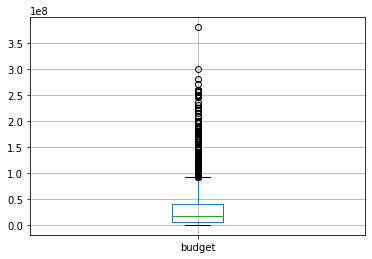

In [378]:
mycond1 = data['budget']>0
mycond2 = data['revenue']>0
mydata = data[mycond1 & mycond2]
#mydata['budget'].describe
mydata.boxplot(column=['budget'])

In [379]:
X = pd.DataFrame(mydata['budget'])
y = pd.DataFrame(mydata['revenue'])

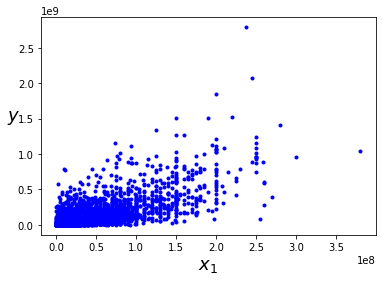

In [380]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [381]:

#X = np.log(X)
#y = np.log(y)

In [382]:

#plt.plot(X, y, "b.")
#plt.xlabel("$x_1$", fontsize=18)
#plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.show()

In [383]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [384]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [385]:
lin_reg.intercept_, lin_reg.coef_

(array([11575827.00416258]), array([[2.03186517e+00, 6.05287453e-09]]))


$ y=11575827x2+2.03x+6.05287453e-09 $

In [386]:

mydata.shape

(5365, 21)

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


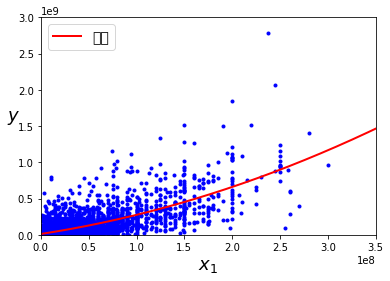

In [387]:
X_new=np.linspace(0, 350000000, 10000).reshape(10000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 350000000, 0, 3000000000])
plt.show()

In [388]:
### 가장 correlation이 높은 budget, revenue, vote_count 간의 회귀식 살펴보자.
# 데이터 준비
mycond1 = data["revenue"]>0
mycond2 = data["budget"]>0
mycond3 = data["vote_count"]>0
mydata = data[mycond1&mycond1&mycond3]

In [389]:
# budget & revenue
X = pd.DataFrame(mydata['budget'])
y = pd.DataFrame(mydata['vote_count'])

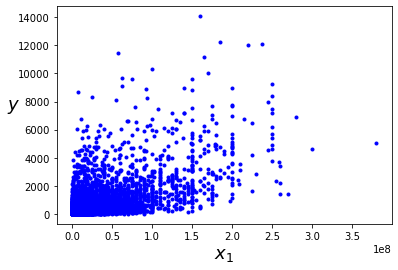

In [390]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [391]:

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


lin_reg.intercept_, lin_reg.coef_

(array([141.56180282]), array([[1.85551291e-05]]))

$ y=141.5x+0.00001 $

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


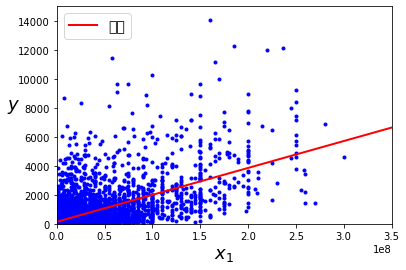

In [392]:
X_new=np.linspace(0, 350000000, 10000).reshape(10000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 350000000, 0, 15000])
plt.show()

In [393]:
# budget & revenue
X = pd.DataFrame(mydata['revenue'])
y = pd.DataFrame(mydata['vote_count'])

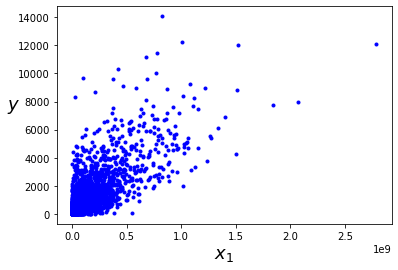

In [394]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [395]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


lin_reg.intercept_, lin_reg.coef_

(array([111.38372926]), array([[ 6.98811038e-06, -1.21805385e-15]]))

$ y= 111.4x^2 + 0.000006x-0.000000000000001 $

C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\testtest\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0, flags=flags)


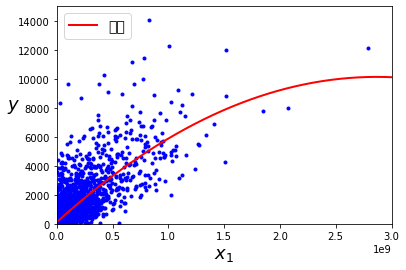

In [396]:
X_new=np.linspace(0, 3000000000, 10000).reshape(10000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3000000000, 0, 15000])
plt.show()